<a href="https://colab.research.google.com/github/wsonguga/SensorAI/blob/main/tutorials/tutorial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Content**

**Regression**

  * Linear Regression
  * Gamma Regressor
  * Huber Regressor
  * Lars & Lasso
    <ul>
    <li>Lars</li>
    <li>Lars with Cross Validation</li>
    <li>Lasso</li>
    <li>Lasso with Cross Validation</li>
    <li>LassoLars</li>
    <li>LassoLars with Cross Validation</li>
    <li>LassoLars with Information-Criteria</li>
    </ul>
  * Orthoganal Marching Pursuit
    <ul>
    <li>Orthoganal Marching Pursuit</li>
    <li>Orthoganal Marching Pursuit with Cross Validation</li>
    </ul>
  * Passive Aggressive Regressor
  * Perceptron Regressor
  * Poisson Regressor
  * Quantile Regressor
  * RANSAC Regressor
  * Ridge
    <ul>
    <li>Ridge</li>
    <li>Ridge with Cross Validation</li>
    <li>Bayesian Ridge</li>
    <li>Automatic Relevance Determination Regression</li>
    </ul>
  * Elastic Nets
    <ul>
    <li>Elastic Net</li>
    <li>Elastic Net with Cross Validation</li>
    <li>Multitask Elastic Net</li>
    <li>Multitask Elastic Net with Cross Validation</li>
    </ul>
  * Stochastic Gradient Descent Regressor
  * Support Vector Machines
    <ul>
    <li>Support Vector</li>
    <li>Linear Support Vector</li>
    <li>Nu Support Vector</li>
    <li>Time Series Support Vector</li>
    </ul>
  * TheilSen Regressor
  * Time Series K Nearest Neighbors Regressor
  * Tweedie Regressor

# Using Google Colab with Tutorial

If using Google Colab, run the following code prior to running any tutorial code.  If running code locally, ignore this section

In [ ]:
# This code clones the SensorAI github repository to colab
  # Note: rerunning this code segment will give an error if the repository currently exists in your colab
!git clone https://github.com/wsonguga/SensorAI.git

# Once this code is executed, click the file icon to the left to verify all files have been cloned

fatal: destination path 'SensorAI' already exists and is not an empty directory.


In [ ]:
# Set the root path to github repository
import os

root_path = "/content/SensorAI"

repo_root = os.path.join("/content/SensorAI")

!ls

os.chdir('SensorAI')

%ls             # display directory content

sample_data  SensorAI
bak/  data/  install.sh*  lib/  README.md  requirements.txt  tutorials/


In [10]:
# This command pulls any updated files from the repository
# This code segment may be re-executed at any point if there have been updates to the repository
!git pull https://github.com/wsonguga/SensorAI.git

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (8/8), 369.49 KiB | 875.00 KiB/s, done.
From https://github.com/wsonguga/SensorAI
 * branch            HEAD       -> FETCH_HEAD
Updating 0b38940..2e1c894
Fast-forward
 tutorials/tutorial_regression.ipynb | 341 +++++++++-----------------------------------------------
 1 file changed, 55 insertions(+), 286 deletions(-)


In [ ]:
# INSTALL REQUIRED PACKAGES

!chmod +x install.sh  # Make the script executable
!./install.sh

# Regression

</br>

**References:**
1. https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/
2. https://www.qualtrics.com/experience-management/research/regression-analysis/

</br>

"Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them."  <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>

Regression is a type of supervised learning.

</br>

**Variables and their definitions:**

* ***Dependent Variables:*** A dependent variable is simple a varibale whose value depends on the value of one or more other variables.  In regression, we are generally want to analyze and predict dependent varibales <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>.

* ***Independent Variables:***  A varibale whose value does not depend on another variable.  In regression, there are different types of indpendent varibles and are listed below.

  * ***Explanatory Variables:***  Variables that explain an event or outcome in an analysis <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>.

  * ***Predictor Variables:*** Values used to predict the value of a dependent variable <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>.

  * ***Experimental Variables:*** Values that can be directly changed by a researcher to asses impact <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>.

  * ***Subject Variables:*** Varibales that can't be directly manipulated, but vary across samples in your dataset <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>.

## Generalized Linear Models

</br>

**References:**
1. https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/
2. https://www.qualtrics.com/experience-management/research/regression-analysis/
3. https://scikit-learn.org/stable/modules/linear_model.html#id41
4. https://builtin.com/data-science/gamma-distribution
5. https://statisticsbyjim.com/probability/gamma-distribution/
6. https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab
7. https://www.statisticshowto.com/poisson-regression/
8. https://sathesant.medium.com/tweedie-loss-function-395d96883f0b
9. https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0

</br>

**Generalized Linear Models (GLM)** are group of models that are based on the basic linear model of regression.

All linear regression models use a loss function to determine the best model.  Basic linear regression models use Ordinary Least Squares (OLS).  Others more sophisticated models add other terms to the loss function.  All models in this section use OLS.

</br>

**GLMs have three components:**

1. ***Linear predictor*** - a linear combination of paramter **(b)** and explanatory value **(x)**.  <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>
2. ***Link function*** - a function that links the linear predictor and the parameter for a specific probability distribution <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>
3. ***Probability distribution*** - The data distribution that represents the observed variable **(y)**.  <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>

Example using the **logit function** as the link function and a **Bernoulli distibution** as the probability distribution, which is called **logisitic regression**:
</br></br>
  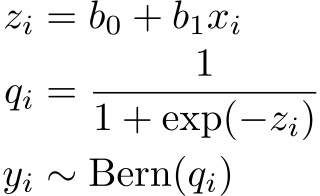
</br></br>
**Logistic Regression <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>**


**Advantages:**

* **Simple model:** Linear regression models utilize simple equations to relate features to the predicted variable. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Computationally efficient:** Linear regression model's simpliciy also makes the computationally efficient.  They are fast and can deal with large amounts of data. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Interpretability of the Output:** Linear regression models are easy to interpret.  Predections based on a feature set can be easly understood.  They can also easily show which features are most important. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

**Disadvantages:**

* **Overly-Simplistic:** Not useful for most realworld problems
. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Linearity Assumption:** "Linear regression makes strong assumptions that there is Predictor (independent) and Predicted (dependent) variables are linearly related which may not be the case."
<a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Severely affected by Outliers:** These models can be very sensitive to outliers, which can drastically alter predictions. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Independence of variables:** Linear models assume the inputs are independent.  This is rarely the case for real world data. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Assumes Homoskedacity:** Linear regression assumes a constant variance around the mean, which is rare in practical problems. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

* **Inability to determine Feature importance:**
Correlated features can cause issues with weights.  Running the same algrothm over the same data can lead to changing feature weights. <a href="https://medium.com/@satyavishnumolakala/linear-regression-pros-cons-62085314aef0">[9]</a>

### Linear Regression

The most common regression type is linear regression.  It is the basis of many regression models.  This section will cover simple/basic linear regression. <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a> <a href="https://www.qualtrics.com/experience-management/research/regression-analysis/">[2]</a>

Linear regression analysis is based on six fundamental assumptions <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>:

1. The dependent and independent variables show a linear relationship between the slope and the intercept <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.
2. The independent variable is not random <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.
3. The value of the residual (error) is zero <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.
4. The value of the residual (error) is constant across all observations <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.
5. The value of the residual (error) is not correlated across all observations <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.
6. The residual (error) values follow the **normal distribution** <a href="https://corporatefinanceinstitute.com/resources/data-science/regression-analysis/">[1]</a>.

Note that for linear regression, the link function is the **identity link function**, which means the linear predictor and the parameter for probability distribution are identical. <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>

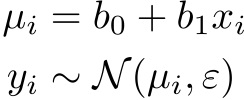

**Linear Regression <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>**


**y = b0 + b1x + e**

* **y** is the dependent variable
* **x** is the independent variable
* **$b_{0}$** is the intercept
* **$b_{1}$** is the slope
* **e** is the error

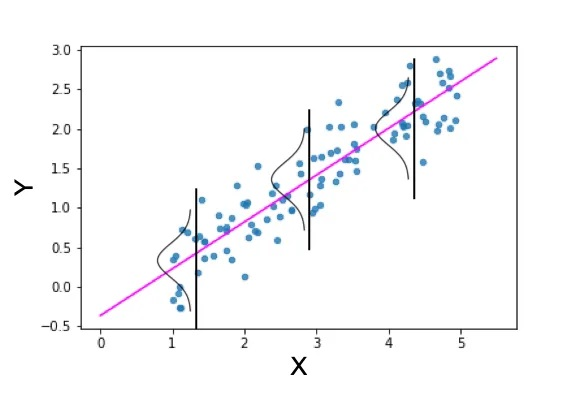

**Illustration for Linear Regression <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>**

### Gamma Regression

</br>

Gamma regression relies on the gamma distribution, which is a special case of the normal distribution <a href="https://builtin.com/data-science/gamma-distribution">[4]</a>.  It is a right-skewed normal distribution <a href="https://statisticsbyjim.com/probability/gamma-distribution/">[5]</a>.  The gamma distribution describes many real world things such as the reliabilabity of mechanical parts/components as the wear over time, cancer rates, insurance claims, and rainfall <a href="https://builtin.com/data-science/gamma-distribution">[4]</a> <a href="https://statisticsbyjim.com/probability/gamma-distribution/">[5]</a>.  It assumes all observable values are positive.

</br>

In **SKLearn**, the **Log function** is used as the link function.





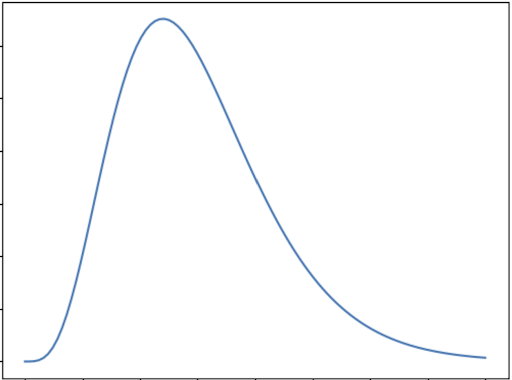

**Gamma Distribution <a href="https://scikit-learn.org/stable/modules/linear_model.html#id41">[3]</a>**

### Poisson Regression

**Poisson regression** used the Poisson distribution as the probability distribution.  **It assumes all observed values are positive**.

SKLearn uses the **log function** as the link function.


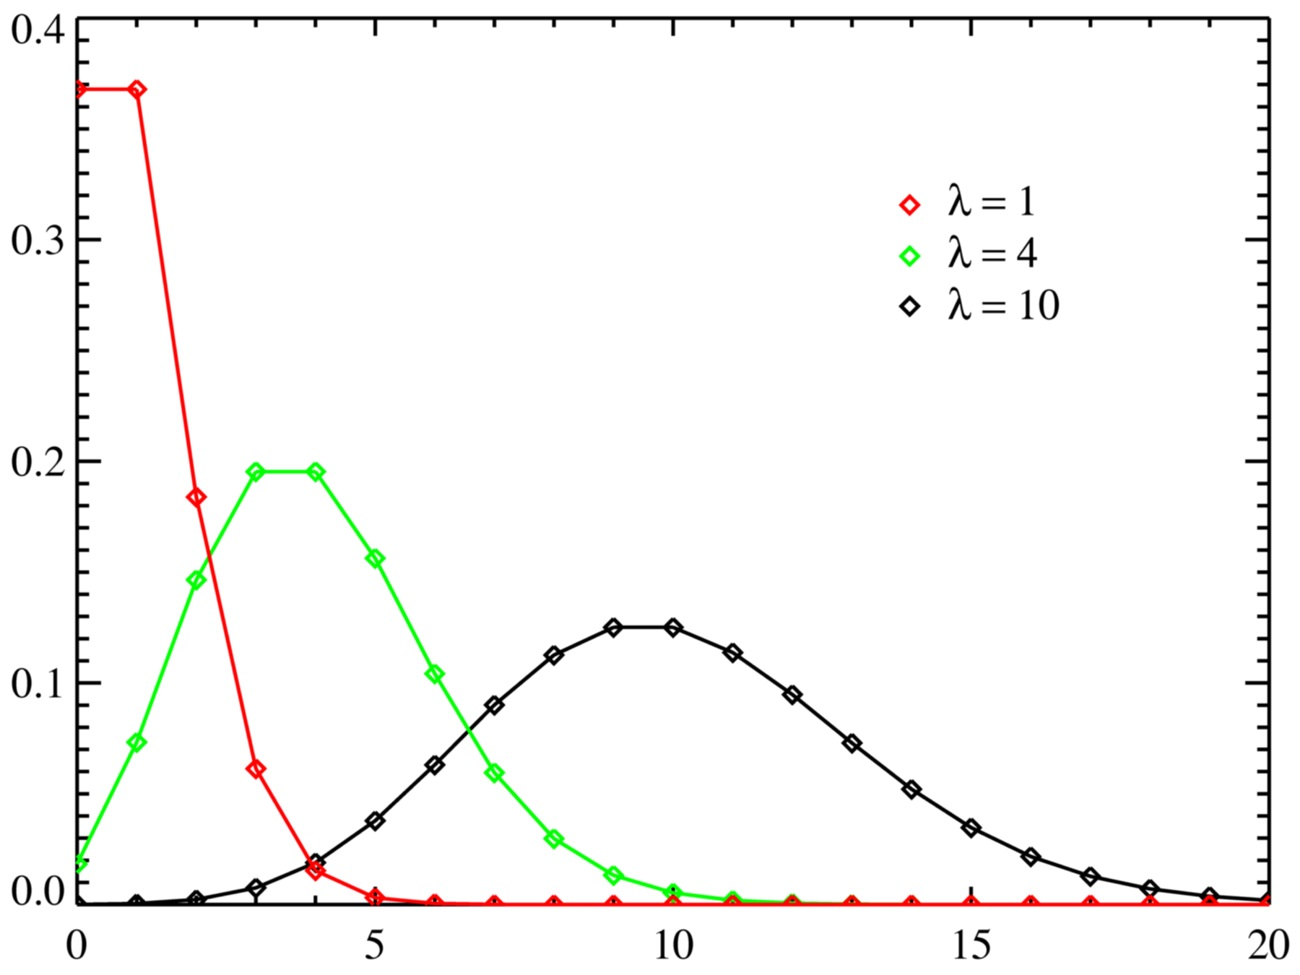

**Image from <a href="https://www.statisticshowto.com/poisson-regression/">[7]</a>**


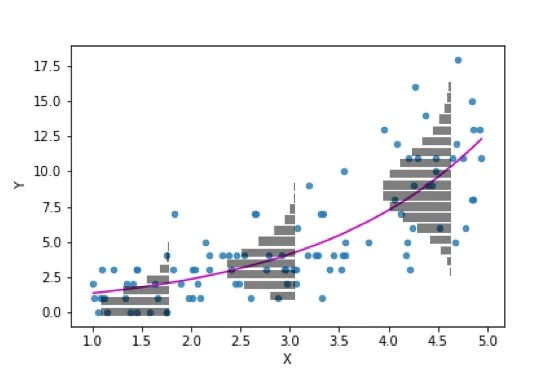

**Poison Regression <a href="https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab">[6]</a>**

### Tweedie Regression

Tweedie regression utilizes the Tweedie distribution as the probability diatribution.  Tweedie is a special case of exponential disperion models.  Tweedie distributions are special cases of other distributions.  Tweedie's have a cluster of data at zero, but can otherwise follow other probability distributions.  This makes them useful for zero-inflated datasets like insurance claims.  <a href="https://sathesant.medium.com/tweedie-loss-function-395d96883f0b">[8]</a>

SKLearn's **Tweedie Regressor** can use Tweedie variants of Normal, Poisoon, Gamma, Inverse Gaussian, and Compound Poisoon Gamma distributions.  The **power** parameter determines which distribution to use.  Additionally, the link function can be **identity** or **log**.


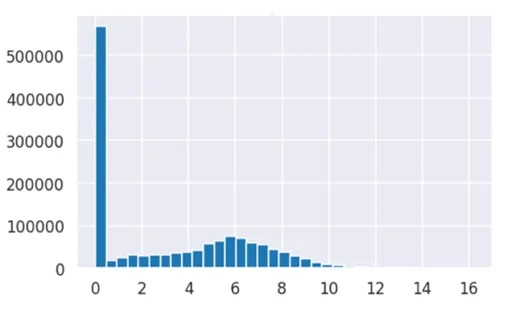

**Sample Tweedie Distribution <a href="https://sathesant.medium.com/tweedie-loss-function-395d96883f0b">[8]</a>**

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.154):
{'linreg__copy_X': True, 'linreg__fit_intercept': True, 'linreg__n_jobs': None, 'linreg__positive': False}


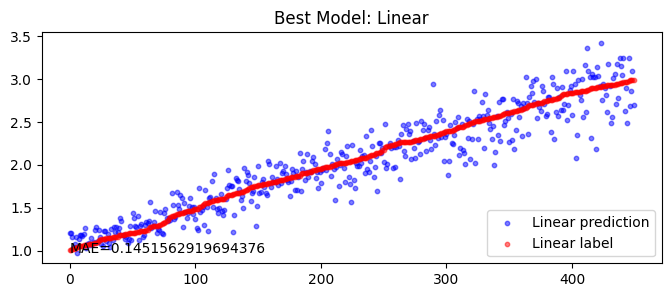

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.175):
{'gamma__alpha': 1.0, 'gamma__fit_intercept': True, 'gamma__max_iter': 100, 'gamma__solver': 'newton-cholesky', 'gamma__tol': 0.0001, 'gamma__verbose': 0, 'gamma__warm_start': False}


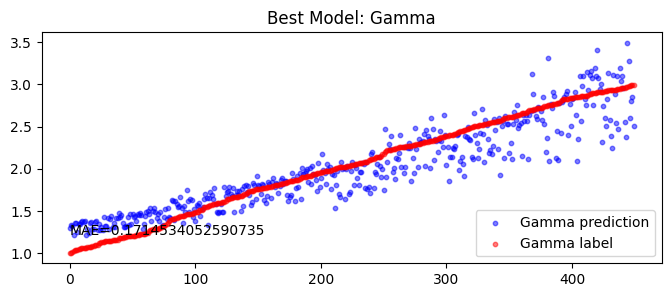

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.166):
{'poisson__alpha': 1.0, 'poisson__fit_intercept': True, 'poisson__max_iter': 100, 'poisson__solver': 'newton-cholesky', 'poisson__tol': 0.0001, 'poisson__verbose': 0, 'poisson__warm_start': False}


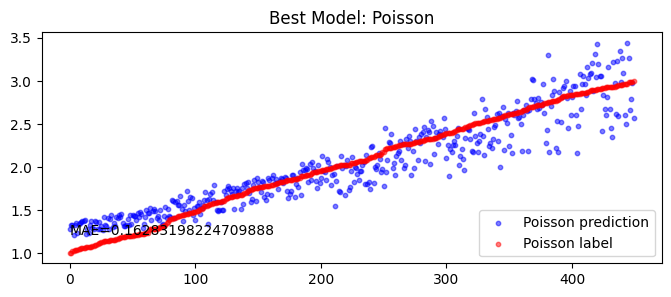

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameter (CV score=-0.163):
{'tweed__alpha': 1.0, 'tweed__fit_intercept': True, 'tweed__link': 'log', 'tweed__max_iter': 100, 'tweed__power': 0, 'tweed__solver': 'lbfgs', 'tweed__tol': 0.0001, 'tweed__verbose': 0, 'tweed__warm_start': False}


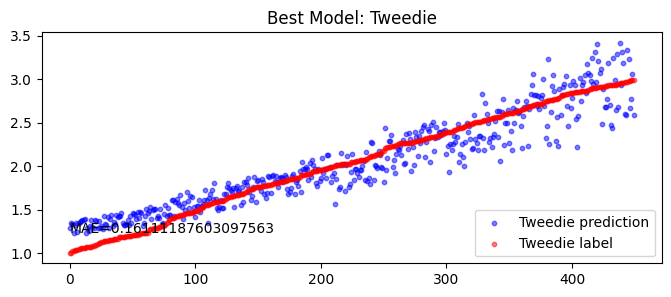

In [11]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

""" Uncomment this code by putting a pound symbol prior to the triple quotes and
# comment out the generate_regression_data below to run code on sk_learn
# diabetes data

p = Path('.')
data_path = p / "data"
data = np.load(data_path / "sk_diabetes.npy")

print("shape of  data is ",data.shape)

x = data[:, :data.shape[1]-1]  # data
y = data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=1500,noise=True)

# Normalize Data
x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

#print(y_test)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

lin = skr.pipeBuild_LinearRegression()
gamma = skr.pipeBuild_GammaRegressor(solver=['lbfgs','newton-cholesky'])
poiss = skr.pipeBuild_PoissonRegressor(solver=['lbfgs','newton-cholesky'])
tweed = skr.pipeBuild_TweedieRegressor(power=[0,1,2,3],link=['identity','log'], solver=['lbfgs','newton-cholesky'])

names=['Linear','Gamma','Poisson','Tweedie']
pipes=[lin,gamma,poiss,tweed]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

### Lars & Lasso


</br>

**References:**
1. https://www.geeksforgeeks.org/least-angle-regression-lars/
2. https://medium.com/acing-ai/what-is-least-angle-regression-lar-bb86756f01d0
3. https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/
4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html
5. https://www.geeksforgeeks.org/understanding-lars-lasso-regression/
6. https://medium.com/@phanindra.josh/the-gifted-regressor-lasso-lars-60d78785e2f4
7. https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LassoLarsIC.html#sklearn.linear_model.LassoLarsIC>
8. https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=The%20Akaike%20information%20criterion%20(AIC,best%20fit%20for%20the%20data.
9. https://medium.com/@analyttica/what-is-bayesian-information-criterion-bic-b3396a894be6
10. https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f

</br>

**Least Angle Regression Shrikage (LARS)** and **Least Absolute Shrinkage and Selection Operator (LASSO)** are two common types of regression.  These two are discussed in this section because there is a version of regression called **LassoLars** that combines these two algorithms.

#### Lars

**Least Angle Regression (LARS)**

LARS "is an algorithm used in regression for high dimensional data (i.e., data with a large number of attributes). Least Angle Regression Shrinkage is somewhat similar to forward stepwise regression. Since it is used with data that has lots of attributes, at each step, LARS finds the attribute which is most highly correlated to the target value. There may be more than one attribute that has the same correlation. In this scenario, LARS averages the attributes and proceeds in a direction that is at the same angle to the attributes. This is exactly why this algorithm is called Least Angle regression. Basically, LARS makes leaps in the most optimally calculated direction without overfitting the model."  <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>

**Algorithm:**


* Normalize all values to have zero mean and unit variance. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>

* Find a variable that is most highly correlated to the residual. Move the regression line in this direction until we reach another variable that has the same or higher correlation. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>

**Note:** Residual is the difference between the observed value and the predicted value. Variable, here implies an attribute. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>


* When we have two variables that have the same correlation, move the regression line at an angle that is in between (i.e., least angle between the two variables). <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>

* Continue this until all of our data is exhausted or until you think the model is big and ‘general’ enough. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>


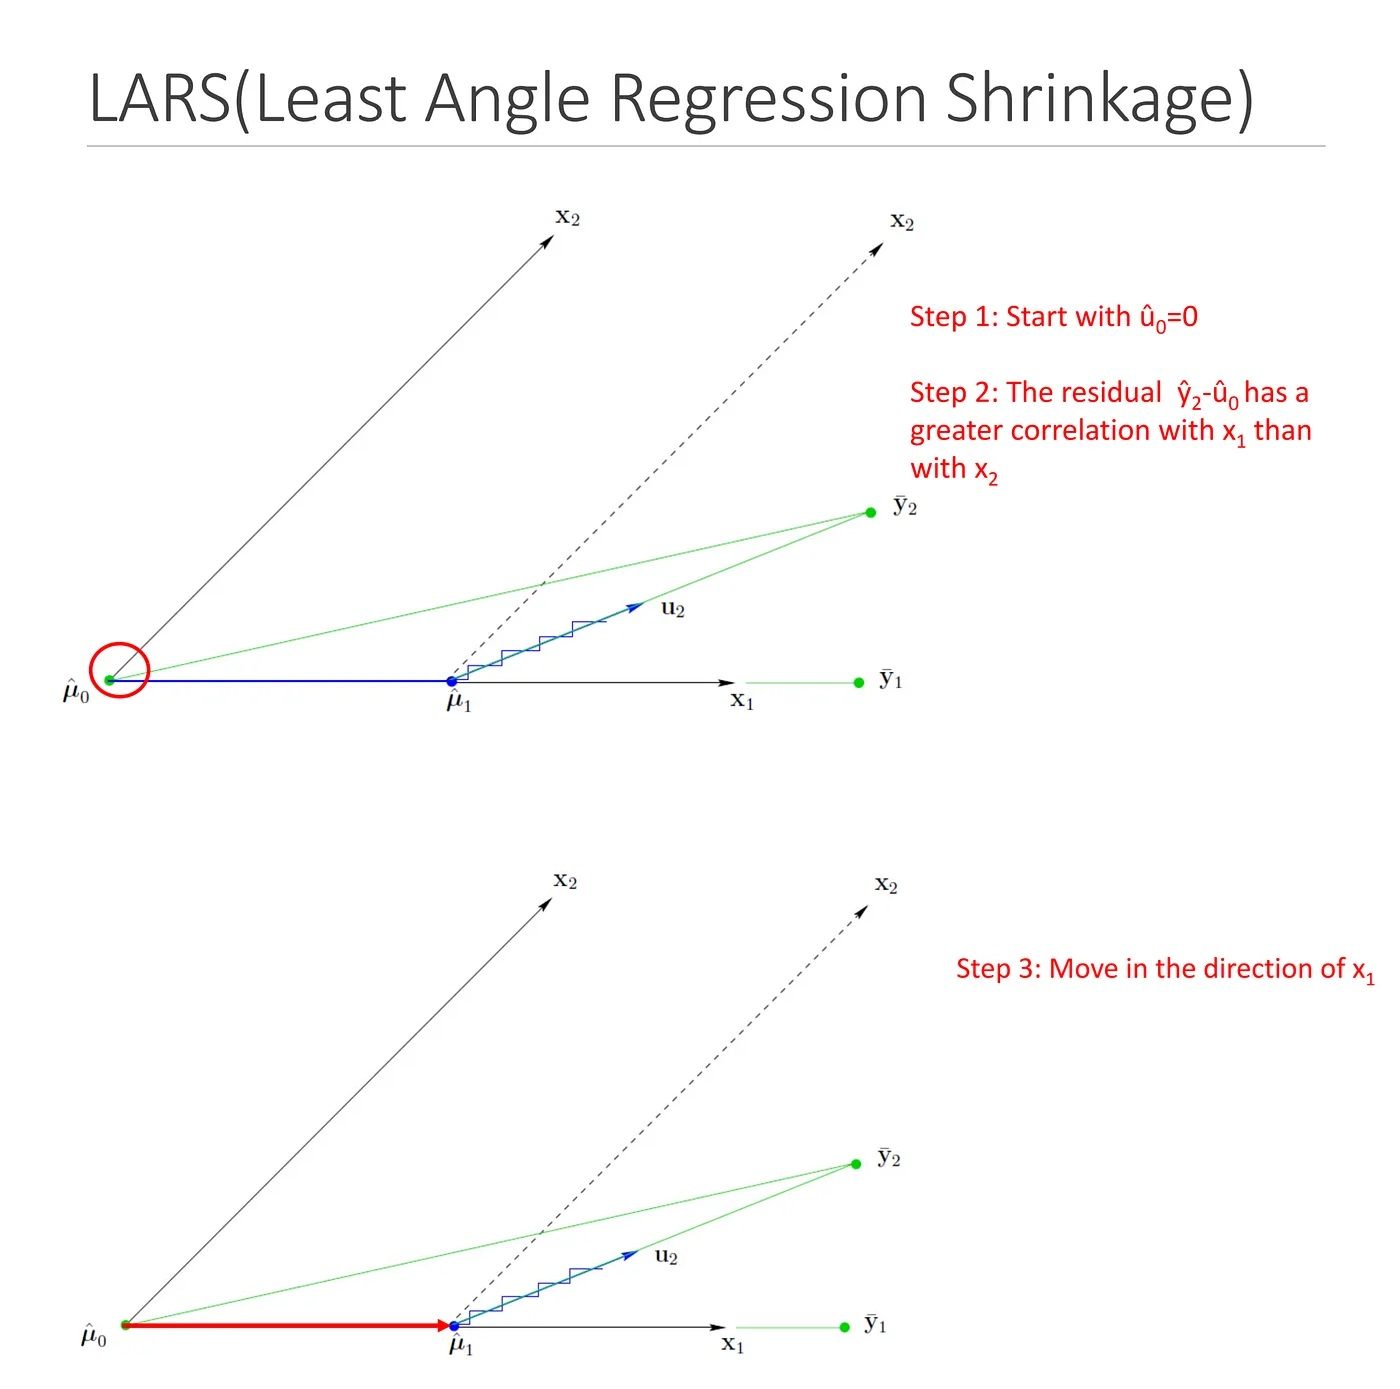

**LARS <a href="https://medium.com/@phanindra.josh/the-gifted-regressor-lasso-lars-60d78785e2f4">[6]</a>**

LARS works as follows:

* All coefficients, ***'B'*** are set to ***0***. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>
* The predictor, **$x_j$** is found that is most correlated to y. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>
* Increase the coefficient **$B_j$** in the direction that is most correlated with y and stop when you find some other predictor. **$x_k$** the has equal or higher correlation than **$x_j$**. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>
* Extend (**$B_j$**, **$B_k$**) in a direction that is equiangular (has the same angle) to both **$x_j$** and **$x_k$**. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>
* Continue and repeat until all predictors are in the model. <a href="https://www.geeksforgeeks.org/least-angle-regression-lars/">[1]</a>

#### Lars with Cross Validation

In **SKLearn**, this is simply Lars with built in cross validation.

#### Lasso

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.  <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

LASSO regression attempts to find a balance between model simplicity and accuracy, by adding a penalty term to the traditional linear regression model.  This can provide sparse solutions where some coefficients are forced to be exactly zero, which makes LASSO particularly useful for feature selection because it can automatically identify and discard variables that are either redundant or irrelavant.  <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>


Lasso is used over regression methods for a more accurate prediction. "This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination."  <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>


**How LASSO regression works:**

1. **Linear regression model**: LASSO regression starts with the standard linear regression model, which assumes a linear relationship between the independent variables (features) and the dependent variable (target). The linear regression equation can be represented as follows:  **y = β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ + ε**.  Where: <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>
  * **y** is the dependent variable (target). <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>
  * **β₀, β₁, β₂, ..., βₚ** are the coefficients (parameters) to be estimated. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>
  * **x₁, x₂, ..., xₚ** are the independent variables (features). <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>
  * **ε** represents the error term. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

2. **L1 regularization**: LASSO regression introduces an additional penalty term based on the absolute values of the coefficients. The **L1 regularization** term is the sum of the absolute values of the coefficients multiplied by a tuning parameter **λ: L₁ = λ * (|β₁| + |β₂| + ... + |βₚ|)**.  Where: <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>  
  * **λ** is the regularization parameter that controls the amount of regularization applied. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>
    * **Note:** In SKLearn, ***alpha*** is the name of this parameter
  * **β₁, β₂, ..., βₚ** are the coefficients. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

3. **Objective function**: The objective of LASSO regression is to find the values of the coefficients that minimize the sum of the squared differences between the predicted values and the actual values, while also minimizing the L1 regularization term: Minimize: **RSS + L₁** Where:  
  * **RSS** is the residual sum of squares, which measures the error between the predicted values and the actual values. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

4. **Shrinking coefficients**: By adding the L1 regularization term, LASSO regression can shrink the coefficients towards zero. When **λ** is sufficiently large, some coefficients are driven to exactly zero. This property of LASSO makes it useful for feature selection, as the variables with zero coefficients are effectively removed from the model. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

5. **Tuning parameter λ**: The choice of the regularization parameter **λ** is crucial in LASSO regression. A larger **λ** value increases the amount of regularization, leading to more coefficients being pushed towards zero. Conversely, a smaller **λ** value reduces the regularization effect, allowing more variables to have non-zero coefficients. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

6. **Model fitting**: To estimate the coefficients in LASSO regression, an optimization algorithm is used to minimize the objective function. Coordinate Descent is commonly employed, which iteratively updates each coefficient while holding the others fixed. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>

LASSO regression offers a powerful framework for both prediction and feature selection, especially when dealing with high-dimensional datasets where the number of features is large. By striking a balance between simplicity and accuracy, LASSO can provide interpretable models while effectively managing the risk of overfitting. <a href="https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/">[3]</a>


**Pros and Cons of LASSO <a href="https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f">[10]</a>:**

</br>

***Pros***

* Select features, by shrinking co-efficient towards zero.
* Avoids over fitting

***Cons***

* Selected features will be highly biased.
* For n << p (n-number of data points, p-number of features), LASSO selects at most n features.
* LASSO will select only one feature from a group of correlated features, the selection is arbitrary in nature.
* For different boot strapped data, the feature selected can be very different.
* Prediction performance is worse than Ridge regression.

#### Lasso with Cross Validation

In SKLearn, this is simply Lasso with built in cross validation.

#### LassoLars

The LassoLars (aka Least Angle Regression Lasso) regressor is a Lasso model fit with Lars.  It is essentially a linear model trained with an L1 prior as a regularizer <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html">[4]</a> <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>.  LassoLars is used in linear regression to decrease the number of features and enhance the model’s predictive ability <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>. LassoLars causes certain regression coefficients shrink to zero as a result of penalizing the absolute values of the regression coefficients <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>. By removing features from the model, the data is easier to understand and more economical. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

"LassoLars in linear regression combines the regularization capabilities of L1 regularization (also called Lasso) with the efficiency of forward selection. Loss of arousal As it moves in the direction of the target variable's greatest correlation, Lasso gradually adds features to the model. This process is continued until a point is reached at which the correlation between the additional variable and the original one would be equal. Due to its tendency to choose a sparse subset of characteristics, this approach works especially well with high-dimensional data. Models with fewer non-zero coefficients are encouraged to be sparse by the regularization term (L1 penalty)."  <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

***Benfits of LassoLars over Lasso:***

1. **Efficiency**: For big datasets with plenty of characteristics, LassoLars is computationally more efficient than Lasso regression. This is because, instead of tackling a challenging optimization issue, it makes use of an effective method that repeatedly adds the most illuminating characteristic at each phase. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

2. **Stability**: The LassoLars is renowned for its ability to choose features steadily. LassoLars offers a consistent feature selection procedure that is less vulnerable to fluctuations in the data, in contrast to Lasso regression, which might be sensitive to the sequence in which features are introduced to the model. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

3. **Interpretability**: LassoLars's path of coefficient estimates offers important information about the relative significance of various characteristics. The characteristics that most substantially increase the model's prediction capacity may be found by tracking the coefficients' changes throughout the regularization process. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

***LassoLars Concepts:***

* **L1-Regularization**: The linear regression objective function gains a penalty term from LassoLars depending on the absolute values of the coefficients. In order to encourage sparsity, this pushes some coefficients to be exactly zero. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

* **Regularization strength (alpha)**: The Lasso and LassoLars coefficients' intensity of penalty is determined by the regularization parameter alpha. A sparser model is produced when the alpha value is higher since it causes the coefficients to shrink more.  Cross-validation is usually used to establish the ideal value of alpha. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

* **Coefficient Path**: As the regularization parameter alpha changes from 0 to 1 (or any other maximum value), LassoLars generates a path of coefficient estimates. Given that the coefficients of more significant characteristics tend to vary more gradually along the road, this path provides light on the relative value of the features. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

* **Forward Feature Selection**: Forward feature selection is carried out by LassoLars, which means that it adds predictors to the model one at a time and advances in the direction of the predictor that has the highest correlation with the response at each step. Its efficiency in high-dimensional spaces arises from this. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

* **Orthogonal Active Sets**: The predictors that have been added to the model are the orthogonal active set of predictors that LassoLarso keeps track of. It is computationally efficient because of this orthogonalization. <a href="https://www.geeksforgeeks.org/understanding-lars-lasso-regression/">[5]</a>

#### LassoLars with Cross Validation

In SKLearn, this is simply LassoLars with built in cross validation.

#### LassoLars with Information-Criteria

This is a modification of the LassoLars model.  It can use the Akaiki information criterion (AIC) or the Bayes Information Crieterion (BIC).  Both of these criteria are used to better select the value of the regularization parameter.  They make a trade-off between the goodness of fit and model complexity. <a href="https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LassoLarsIC.html#sklearn.linear_model.LassoLarsIC">[7]</a>  In this approach, multiple models are created with differing combinations of the independent variables.  Then either AIC or BIC is used to compare them to choose the best one.

The **Akaike information criterion (AIC)** is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. AIC is calculated from:  <a href="https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=The%20Akaike%20information%20criterion%20(AIC,best%20fit%20for%20the%20data.">[8]</a>

* the number of independent variables used to build the model. <a href="https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=The%20Akaike%20information%20criterion%20(AIC,best%20fit%20for%20the%20data.">[8]</a>

* the maximum likelihood estimate of the model (how well the model reproduces the data). <a href="https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=The%20Akaike%20information%20criterion%20(AIC,best%20fit%20for%20the%20data.">[8]</a>

The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables. <a href="https://www.scribbr.com/statistics/akaike-information-criterion/#:~:text=The%20Akaike%20information%20criterion%20(AIC,best%20fit%20for%20the%20data.">[8]</a>

</br>
$$
AIC = 2K - 2*ln*(L)
$$

* **$K$** is the number of independent variables
* **$L$** is the log-likelihood estimate

The **Bayesian information criterion (BIC)** is a criterion for model selection among a finite set of models. It is based, in part, on the likelihood function, and it is closely related to AIC. <a href="https://medium.com/@analyttica/what-is-bayesian-information-criterion-bic-b3396a894be6">[9]</a>

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. The BIC resolves this problem by introducing a penalty term for the number of parameters in the model. The penalty term is larger in BIC than in AIC. <a href="https://medium.com/@analyttica/what-is-bayesian-information-criterion-bic-b3396a894be6">[9]</a>

</br>

$$
BIC = *ln*(n)k - 2*ln*(\hat{L})
$$

* **$\hat{L}$** is the maximized value of the likelihood function of the model
* **$n$** is the numbar of data points
* **$k$** is the number of free parameters to be estimated

Length of waveform 1000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.835):
{'lars__copy_X': True, 'lars__eps': 2.220446049250313e-16, 'lars__fit_intercept': True, 'lars__fit_path': True, 'lars__jitter': None, 'lars__n_nonzero_coefs': 500, 'lars__precompute': 'auto', 'lars__verbose': False}


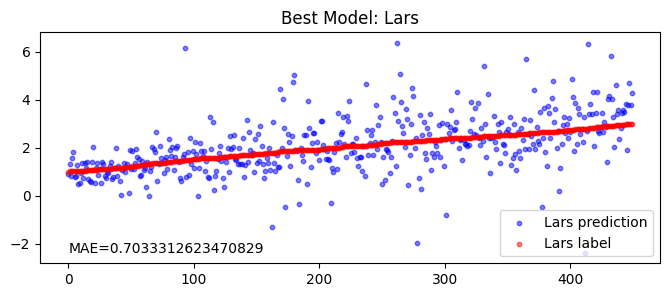

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.177):
{'larscv__copy_X': True, 'larscv__cv': None, 'larscv__eps': 2.220446049250313e-16, 'larscv__fit_intercept': True, 'larscv__max_iter': 500, 'larscv__max_n_alphas': 1000, 'larscv__n_jobs': None, 'larscv__precompute': 'auto', 'larscv__verbose': False}


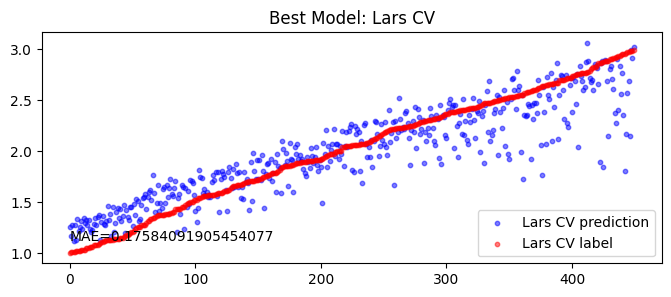

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=-0.496):
{'lasso__alpha': 0.5, 'lasso__copy_X': True, 'lasso__fit_intercept': True, 'lasso__max_iter': 200, 'lasso__positive': False, 'lasso__precompute': False, 'lasso__selection': 'cyclic', 'lasso__tol': 0.0001, 'lasso__warm_start': False}


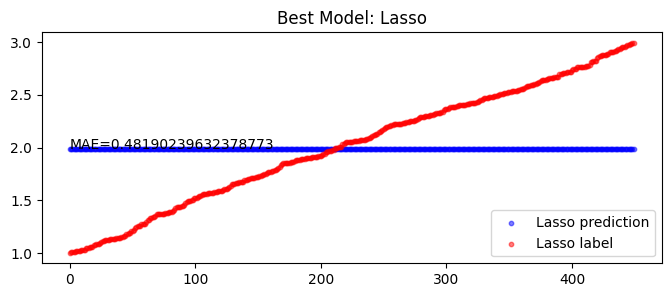

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.129):
{'lassocv__alphas': None, 'lassocv__copy_X': True, 'lassocv__cv': None, 'lassocv__eps': 0.01, 'lassocv__fit_intercept': True, 'lassocv__max_iter': 1000, 'lassocv__n_alphas': 100, 'lassocv__n_jobs': None, 'lassocv__positive': False, 'lassocv__precompute': 'auto', 'lassocv__selection': 'random', 'lassocv__tol': 0.0001, 'lassocv__verbose': False}


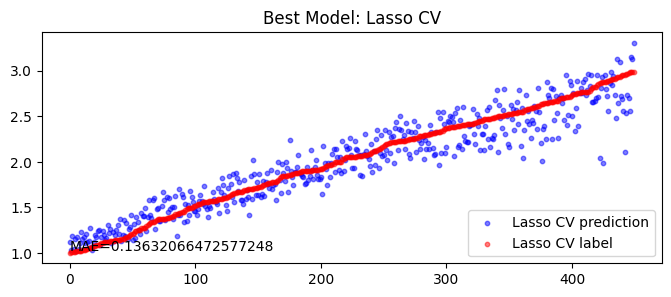

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.496):
{'lassolars__alpha': 0.5, 'lassolars__copy_X': True, 'lassolars__eps': 2.220446049250313e-16, 'lassolars__fit_intercept': True, 'lassolars__fit_path': True, 'lassolars__jitter': None, 'lassolars__max_iter': 500, 'lassolars__positive': False, 'lassolars__precompute': 'auto', 'lassolars__verbose': False}


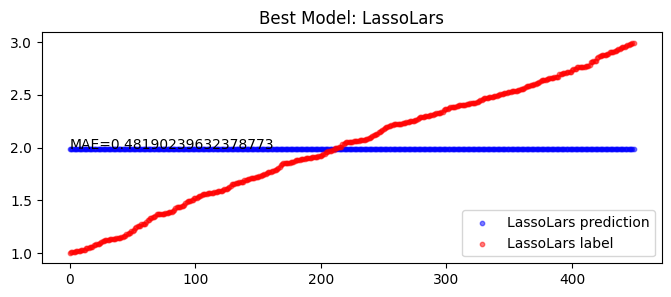

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.124):
{'lassolarscv__copy_X': True, 'lassolarscv__cv': None, 'lassolarscv__eps': 2.220446049250313e-16, 'lassolarscv__fit_intercept': True, 'lassolarscv__max_iter': 500, 'lassolarscv__max_n_alphas': 500, 'lassolarscv__n_jobs': None, 'lassolarscv__positive': False, 'lassolarscv__precompute': 'auto', 'lassolarscv__verbose': False}


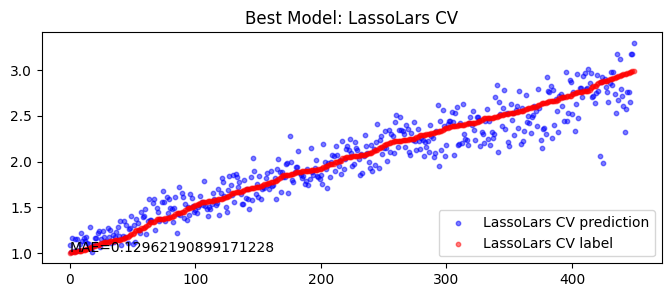

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.124):
{'lassolarsic__copy_X': True, 'lassolarsic__criterion': 'aic', 'lassolarsic__eps': 2.220446049250313e-16, 'lassolarsic__fit_intercept': True, 'lassolarsic__max_iter': 500, 'lassolarsic__noise_variance': None, 'lassolarsic__positive': False, 'lassolarsic__precompute': 'auto', 'lassolarsic__verbose': False}


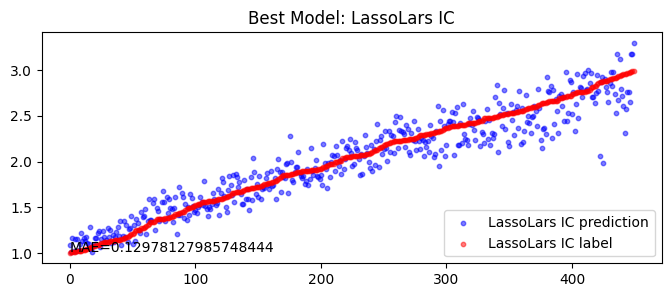

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

""" Uncomment this code by putting a pound symbol prior to the triple quotes and
# comment out the generate_regression_data below to run code on sk_learn
# diabetes data

p = Path('.')
data_path = p / "data"
data = np.load(data_path / "sk_diabetes.npy")

print("shape of  data is ",data.shape)

x = data[:, :data.shape[1]-1]  # data
y = data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=1500,noise=True)

print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

lars = skr.pipeBuild_Lars()
lasso = skr.pipeBuild_Lasso(alpha=[0.5,0.75],selection=['cyclic','random'],max_iter=[200])
larscv = skr.pipeBuild_LarsCV()
lassocv = skr.pipeBuild_LassoCV(eps=[0.01],selection=['random'])
lassolars = skr.pipeBuild_LassoLars(alpha=[0.5,0.75])
lassolarscv = skr.pipeBuild_LassoLarsCV(max_n_alphas=[500,1000])

# LassoLarsIC won't work if number of samples (waveforms) is less than number of
# than number of features (length of one input)
# Waveform generator produces a signal of 1000 data points per waveform
lassolarsic = skr.pipeBuild_LassoLarsIC(criterion=['aic','bic'])

names=['Lars','Lars CV','Lasso','Lasso CV','LassoLars','LassoLars CV','LassoLars IC']
pipes=[lars,larscv,lasso,lassocv,lassolars,lassolarscv,lassolarsic]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

### Ridge

</br>

**References:**
1. https://www.mygreatlearning.com/blog/what-is-ridge-regression/
2. https://www.ibm.com/topics/ridge-regression
3. https://spotintelligence.com/2023/05/26/l1-l2-regularization/
4. https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f


</br>

"Ridge regression is a model-tuning method that is used to analyze any data that suffers from multicollinearity" <a href="https://www.mygreatlearning.com/blog/what-is-ridge-regression/">[1]</a>.   It is also known as ***L2 regularization*** and is one of several types of regularization for linear regression models. "When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values" <a href="https://www.mygreatlearning.com/blog/what-is-ridge-regression/">[1]</a>.

</br>

"**Regularization** is a statistical method to reduce errors caused by overfitting on training data. Ridge regression specifically corrects for multicollinearity in regression analysis. This is useful when developing machine learning models that have a large number of parameters, particularly if those parameters also have high weights. While this article focuses on regularization of linear regression models, note that ridge regression may also be applied in logistic regression." <a href="https://www.ibm.com/topics/ridge-regression">[2]</a>

</br>

L2 regularization adds the sum of the squared values of the model's coefficients to the loss function. Unlike L1 regularization, L2 regularization does not force the coefficients to be exactly zero but instead encourages them to be small. L2 regularization can prevent overfitting by spreading the influence of a single feature across multiple features. It is advantageous when there are correlations between the input features.

</br>

The choice between L1 and L2 regularization depends on the specific problem and the characteristics of the data. For example, L1 regularization produces sparse models, which can be advantageous when feature selection is desired. L2 regularization, on the other hand, encourages small but non-zero coefficients and can be more suitable when there are strong correlations between features. <a href="https://spotintelligence.com/2023/05/26/l1-l2-regularization/">[3]</a>


**Concepts of Ridge Regression:**

1. **Linear Model:** Like standard linear regression, ridge regression models the relationship between the input features $X$ and the target variable $y$ through a linear equation:

  $$
    y = X β + ϵ
  $$

  **where:**

  * X is the matrix of input features,

  * β is the vector of regression coefficients (the model parameters),

  * ϵ is the noise term (assumed to follow a Gaussian distribution).

</br>

2. **Ordinary Least Squares (OLS) Regression:** In OLS, the objective is to minimize the sum of squared residuals (or errors):

  $$
    minimize \text{ } \| y-Xβ \|^2
  $$

  **where** $\| y-Xβ \|^2$ is the squared difference between the predicted values and the true target values.
  
   </br>

3. **Regularization in Ridge Regression:** Ridge regression modifies the standard OLS objective by adding a **penalty term** to the loss function. The penalty term is proportional to the **L2-norm** (squared magnitude) of the coefficients $β$

  $$
    minimize \text{ } \| y-Xβ \|^2 + λ \| β \|^2
  $$

  **where:**

* $\| y-Xβ \|^2$ is the residual sum of squares (as in OLS),

* $λ \| β \|^2$ is the penalty term, where $λ$ is the regularization parameter (also called the ridge parameter).

  </br>

  The term $λ \| β \|^2$ is the **L2 regularization**, which adds a cost for large coefficients. The larger the value of $λ$, the more the coefficients are penalized, and the model will shrink the coefficients towards zero, thus reducing overfitting.

   </br>

4. **The Role of the Regularization Parameter $λ$:**

* If $λ-0$, ridge regression is equivalent to standard OLS regression, as no regularization is applied.

* If $λ$ is large, the penalty term dominates, and the coefficients $β$ are forced closer to zero. This helps prevent overfitting by discouraging overly complex models.

   </br>


5. **Solution:** The closed-form solution for ridge regression can be computed as:

  $$
    \hat{β} = (X^T X + λ I)^{-1} X^T y
  $$

  **where:**

* $X^T X$ is the Gram matrix of the features,

* $λ I$ is the regularization term, with $I$ being the identity matrix, and

* $λ$ is the regularization parameter.

  This solution stabilizes the inverse of $X^T X$, making it well-defined even if $X^T X$ is close to singular (i.e., when features are highly correlated or when there are more features than samples).

**Pros & Cons of Ridge <a href="https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f">[4]</a>:**

</br>

***Pros***

* Trades variance for bias (i.e. in presence of co-linearity, it is worth to have biased results, in order to lower the variance.)
* Reduces over fitting
* Works well with high-diminsionaly data
* Improves model generalization

***Cons***

* Increases bias
* Need to select perfect $λ$ (hyper parameter)
* Model interpret-ability is low
* Does not perform feature selection

</br>

**Comparison with Other Regularized Methods:**

* **Ridge Regression vs. Lasso Regression:** Both are regularized regression methods, but ridge regression uses L2 regularization (squared coefficients) to shrink all coefficients, while lasso regression uses L1 regularization (absolute value of coefficients) and can shrink some coefficients to exactly zero, effectively performing feature selection.

* **Ridge Regression vs. Elastic Net:** Elastic Net combines both L1 and L2 regularization, providing a compromise between ridge and lasso regression. It is particularly useful when there are correlations between features.

#### **Ridge with Cross Validation**

In SKLearn, this is simply Ridge Regression with built in cross-validation.

#### **Bayesian Ridge**

</br>

**References:**

1. https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression
2. https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression

</br>

Bayesian Ridge works similar to the standard ridge.  However unlike the standard ridge where  λ is set manually, Bayessian Ridge tune the parameters based on prior data using Bayes Theorem.  <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>  It assumes a spherical gaussian distribution.  <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

**Concepts of Bayesian Ridge Regression:**

1. **Linear Model:** Like standard linear regression, Bayesian Ridge Regression models the relationship between the input features $X$ and the target variable $y$ through a linear equation:

  $$
    y = X β + ϵ
  $$

  where:

  * X is the matrix of input features,

  * β is the vector of regression coefficients (the model parameters),

  * ϵ is the noise term (assumed to follow a Gaussian distribution).

</br>

2. **Bayesian Inference:** Bayesian Ridge Regression applies Bayesian methods to estimate the distribution over the regression coefficients $β$. Instead of finding a single best-fit set of coefficients (as in ordinary least squares regression), Bayesian Ridge Regression computes a distribution of coefficients, reflecting the uncertainty about their true values.

3. **Prior Distribution:** The regression coefficients $β$ are given a prior distribution, typically a Gaussian distribution with zero mean and some variance. The prior represents our beliefs about the regression coefficients before observing any data. The prior is updated based on the observed data to obtain the posterior distribution over the coefficients.

  In Bayesian Ridge Regression, the prior is often assumed to be:

  $$
    β ∼ N (0,λ^{-1} I)
  $$

  where $λ$ is a regularization parameter controlling the spread of the prior distribution (i.e., the amount of shrinkage applied to the coefficients).

4. **Likelihood Function:** The likelihood represents how likely the observed data is given a particular set of coefficients. For linear regression, the likelihood is assumed to follow a Gaussian distribution with mean $Xβ$ and some fixed variance $σ^2$:

  $$
    p(y|X,β) = N(y|X β, σ^2 I)
  $$

  where $y$ is the observed target variable.

5. **Posterior Distribution:** After observing the data, Bayesian Ridge Regression computes the posterior distribution of the coefficients using Bayes' rule:

  $$
    p(β|X,y) = \frac{p(y|X,β)p(β)}{p(y|X)}
  $$

  The posterior distribution combines the prior and the likelihood of the data, and it provides a probabilistic estimate of the regression coefficients.

6. **Shrinkage:** The Bayesian framework incorporates regularization through the prior distribution. The coefficients $β$ are shrunk toward zero, meaning that less relevant features will be assigned smaller coefficient values. This regularization helps prevent overfitting, especially when there are many features or noisy data.

7. **Prediction:** Once the posterior distribution of the coefficients is obtained, predictions for new data points $X_{new}$ are made by integrating over the posterior distribution of $β$:

  $$
    p(y_{new}|X_{new},X,y) = \int_{}^{} p(y_{new}|X_{new},β) p(β|X,y) \,dβ
  $$

  This allows for uncertainty in the predictions, which is one of the key advantages of Bayesian Ridge Regression.

**Advantages of Bayesian Ridge Regression:**

* **Uncertainty Quantification:** Bayesian Ridge Regression provides a distribution over the coefficients, allowing you to quantify the uncertainty in the model parameters and predictions.

* **Regularization:** The method automatically includes a form of regularization (shrinkage) to prevent overfitting, making it particularly useful in high-dimensional or noisy datasets.

* **Flexibility:** The model can handle situations where the number of features is large relative to the number of data points, as it can regularize the coefficients in a way that standard linear regression cannot.

**How it works in practice:**

* **Training:** The model estimates the posterior distribution of the coefficients using the training data and prior assumptions. In practice, this is often done using iterative methods like Expectation-Maximization (EM) or Markov Chain Monte Carlo (MCMC).

* **Prediction:** After training, predictions are made by integrating over the posterior distribution, which provides both the predicted values and their associated uncertainties.

**Comparison with Other Methods:**

* **Linear Regression (OLS):** Unlike ordinary least squares (OLS) regression, which provides a single point estimate for the coefficients, Bayesian Ridge Regression provides a probabilistic distribution over the coefficients.

* **Ridge Regression:** In classical ridge regression, the regularization parameter (lambda) is fixed, and the model seeks a single point estimate for the coefficients. Bayesian Ridge Regression, on the other hand, incorporates prior distributions over the coefficients and estimates them probabilistically, allowing for a more flexible and principled regularization approach.

#### Automatic Relevance Determination Regression

</br>

**References:**
1. "https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca"

</br>

Automatic Relevance Determination (ARD) is a regression technique that is used to automatically select the most relevant features of a dataset.  It is a Bayesian regression techinque.  It is also known as Relevance Vector Regression (RVR).  

</br>

The goal is to automatically assess how important each input feature is in predicting the output. This is done by introducing a hyperparameter for each feature (or input dimension) that controls the variance associated with that feature. Features with large hyperparameters are considered more relevant, while those with small hyperparameters are considered less relevant or even irrelevant.  Features with higher weights are considered the most important.  <a href="https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca">[1]</a>

</br>

It assumes an eliptical gaussian distribution instead of a spherical one.  <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

</br>

**Advantages:**

* Feature Selection ARD regression automatically determines the relevance of features, reducing the risk of overfitting and eliminating the need for manual feature selection. This results in more robust models that capture the most informative aspects of the data. <a href="https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca">[1]</a>

* Model Interpretability By assigning relevance weights to each feature, ARD regression provides insights into the importance of different variables in the predictive process. This not only enhances the interpretability of the model but also aids in identifying key drivers behind the predictions. <a href="https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca">[1]</a>

* Computational Efficiency ARD regression effectively handles high-dimensional datasets by discarding irrelevant features, reducing the dimensionality of the problem. This leads to faster training and inference times, making it suitable for large-scale data analysis. <a href="https://medium.com/@danielwume/automatic-relevance-determination-regression-unleashing-the-power-of-python-for-enhanced-b63ebb9b37ca">[1]</a>

Length of waveform 1000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.037):
{'ridge__alpha': 2.0, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__tol': 0.0001}


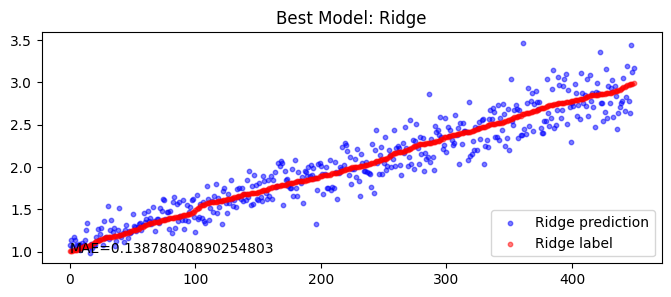

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-0.031):
{'ridgecv__alpha_per_target': False, 'ridgecv__alphas': (0.2, 2.0, 20.0), 'ridgecv__fit_intercept': True, 'ridgecv__gcv_mode': 'auto', 'ridgecv__scoring': None, 'ridgecv__store_cv_values': False}


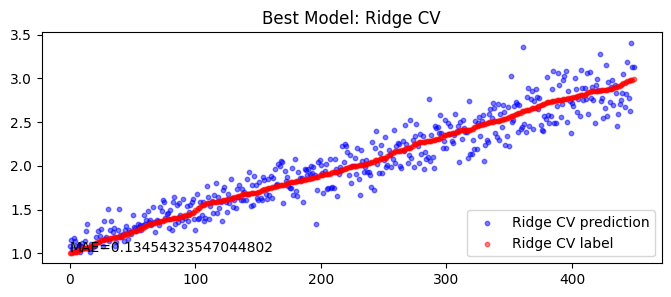

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.027):
{'bayridge__alpha_1': 1e-06, 'bayridge__alpha_2': 1e-06, 'bayridge__alpha_init': None, 'bayridge__compute_score': False, 'bayridge__copy_X': True, 'bayridge__fit_intercept': True, 'bayridge__lambda_1': 1e-06, 'bayridge__lambda_2': 1e-06, 'bayridge__lambda_init': None, 'bayridge__tol': 0.001, 'bayridge__verbose': False}


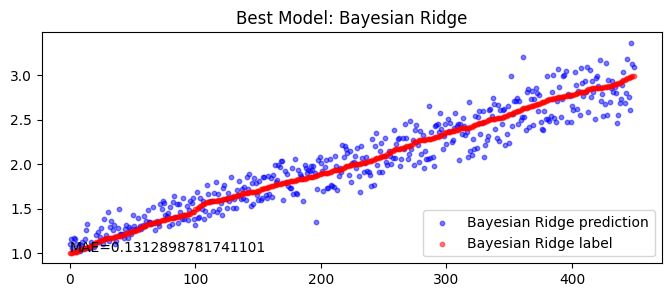

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.026):
{'ard__alpha_1': 1e-06, 'ard__alpha_2': 1e-06, 'ard__compute_score': False, 'ard__copy_X': True, 'ard__fit_intercept': True, 'ard__lambda_1': 1e-06, 'ard__lambda_2': 1e-06, 'ard__threshold_lambda': 10000, 'ard__tol': 0.001, 'ard__verbose': False}


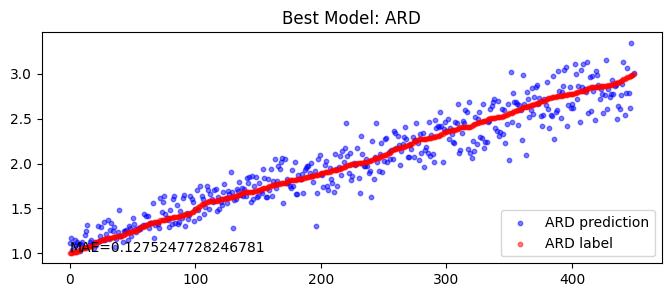

In [15]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

""" Uncomment this code by putting a pound symbol prior to the triple quotes and
# comment out the generate_regression_data below to run code on sk_learn
# diabetes data

p = Path('.')
data_path = p / "data"
data = np.load(data_path / "sk_diabetes.npy")

print("shape of  data is ",data.shape)

x = data[:, :data.shape[1]-1]  # data
y = data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=1500,noise=True)

print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

ridge = skr.pipeBuild_Ridge(alpha=[1.0,2.0])
ridgecv = skr.pipeBuild_RidgeCV(alphas=[(0.1, 1.0, 10.0),(0.2, 2.0, 20.0)])
bayridge = skr.pipeBuild_BayesianRidge()
ard = skr.pipeBuild_ARDRegression()

names=['Ridge','Ridge CV','Bayesian Ridge','ARD']
pipes=[ridge,ridgecv,bayridge,ard]

"""
names=['Ridge CV']
pipes=[ridgecv]
#"""

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_squared_error') #'neg_mean_absolute_error')
#skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

### Elastic Nets

</br>

**References:**

1. https://spotintelligence.com/2023/05/26/l1-l2-regularization/
2. https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net
3. https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f

</br>

Elastic Nets are simply regression models that include both L1 and L2 regularization.  A combination of Lasso and Ridge. <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>

</br>

**Combining L1 and L2 Regularization:** Elastic Net regularization introduces a linear combination of L1 (lasso) and L2 (ridge) penalties to the linear regression model. The objective function for Elastic Net is:

</br>

  $$
    minimize \text{ } \| y-Xβ \|^2 + λ_1 \| β \|_1 + λ_2 \| β \|_2^2
  $$

  **where:**

* $y$ is the target variable,

* $X$ is the matrix of input features,

* $λ$ is the vector of regression coefficients,

* $\| y-Xβ \|^2$ is the residual sum of squares (the OLS loss),

* $\| β \|_1$ is the L1 norm (absolute sum of coefficients, promoting sparsity),

* $\| β \|_2^2$ is the L2 norm (sum of squared coefficients, promoting smaller coefficients),

* $λ_1$ is the regularization parameter controlling the L1 penalty (lasso),

* $λ_2$ is the regularization parameter controlling the L2 penalty (ridge).

</br>

Elastic Net regularization combines the advantages of both L1 and L2 regularization. The L1 regularization term encourages sparsity and feature selection, driving some coefficients to exactly zero. This helps in selecting the most relevant features and reducing the complexity of the model. On the other hand, the L2 regularization term encourages smaller but non-zero coefficients, preventing any one feature from dominating the model's predictions and improving the model's stability. <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>  This also helps with handling multicollinearity.

The values of **λ1** and **λ2** control the balance between L1 and L2 regularization. A higher value λ1 emphasizes sparsity, promoting feature selection, while a higher value of **λ2** emphasizes weight shrinkage and overall complexity control. <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>

Elastic Net regularization is particularly useful when dealing with datasets that have high-dimensional features and strong feature correlations. It provides a flexible regularization approach that allows for a trade-off between feature selection and weight shrinkage based on the specific problem and the desired behaviour of the model. <a href="https://scikit-learn.org/1.0/modules/linear_model.html#bayesian-ridge-regression">[1]</a>

**Advantages Over Lasso and Ridge:** Elastic Net is particularly useful when:

* **There are correlations among features:** Lasso tends to pick only one feature from a group of correlated features, while ridge regression keeps all features with small coefficients. Elastic Net can keep the correlated features and shrink them together.

* **The number of predictors is much larger than the number of observations:** Elastic Net can handle situations where you have many more features than data points (p >> n), which could lead to overfitting in standard regression models.

**Pros & Cons of Elastic Nets <a href="https://medium.com/@eculidean/pros-and-cons-of-common-machine-learning-algorithms-45e05423264f">[3]</a>:**

</br>

***Pros***

1. **Combines Benefits of Lasso and Ridge:**

  * Elastic Net offers the feature selection property of Lasso while also handling multicollinearity effectively by using Ridge regularization.

2. **Works Well with Highly Correlated Features:**

  * In datasets where features are highly correlated, Elastic Net tends to perform better than Lasso because it keeps the correlated features and shrinks them together, rather than eliminating them entirely as Lasso might do.

3. **Better Performance in High-Dimensional Data:**

  * Elastic Net is particularly effective when there are more predictors than observations (p > n), which can be a common scenario in modern machine learning problems.

4. **Flexibility:**

  * The regularization parameters $λ_1$ and $λ_2$ give you the flexibility to adjust the model based on the specific structure and nature of the data.

***Cons***

1. **Need to Tune Two Parameters:**

  * Unlike Lasso and Ridge, which require tuning of a single parameter, Elastic Net requires the tuning of two hyperparameters:
$λ_1$ and $λ_2$, which can be computationally expensive.

2. **Computationally More Intensive:**

  * Elastic Net may require more computational resources than Lasso or Ridge, especially when dealing with large datasets, as it involves solving a more complex optimization problem.

#### **Elastic Net with Cross Validation**

This SKLearn regrossor includes cross-validation.

#### **Multitask Elastic Net**

The MultiTaskElasticNet is an elastic-net model that estimates sparse coefficients for multiple regression problems jointly: Y is a 2D array of shape (n_samples, n_tasks). The constraint is that the selected features are the same for all the regression problems, also called tasks. <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

</br>

Mathematically, it consists of a linear model trained with a mixed $L_1L_2$-norm and $L_2$-norm for regularization. <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

</br>

The implementation in the class MultiTaskElasticNet uses coordinate descent as the algorithm to fit the coefficients. <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

#### **Multitask Elastic Net with Cross Validation**

The class MultiTaskElasticNetCV can be used to set the parameters ***alpha (a)*** and ***l1_ratio (p)*** by cross-validation. <a href="https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net">[2]</a>

**In the plot above:**

* The **R-squared** and **MSE values** indicate how well each model performs on the test set.

* The **coefficient plots** will show how each model handles the features:

  * **Ridge:** Cefficients can be small, but non-zero.

  * **Lasso:** Some coefficients are exactly zero, indicating which features are selected.

  * **Elastic Net:** Similar to Lasso, but it can shrink correlated features together, which can be an advantage over Lasso in certain situations.

Length of waveform 1000
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=-0.450):
{'elastic__alpha': 0.5, 'elastic__copy_X': True, 'elastic__fit_intercept': True, 'elastic__l1_ratio': 0.5, 'elastic__max_iter': 1000, 'elastic__positive': False, 'elastic__precompute': False, 'elastic__selection': 'cyclic', 'elastic__tol': 0.0001, 'elastic__warm_start': False}


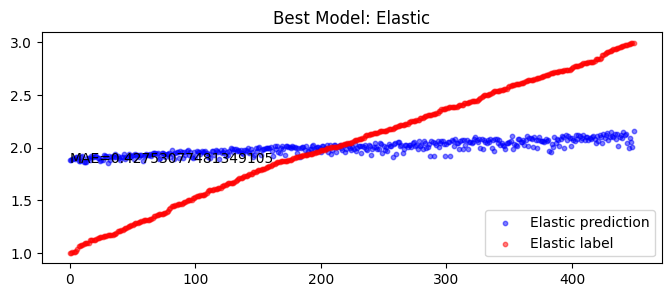

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.124):
{'elasticcv__alphas': None, 'elasticcv__copy_X': True, 'elasticcv__cv': None, 'elasticcv__eps': 0.001, 'elasticcv__fit_intercept': True, 'elasticcv__l1_ratio': 0.5, 'elasticcv__max_iter': 1000, 'elasticcv__n_alphas': 100, 'elasticcv__n_jobs': None, 'elasticcv__positive': False, 'elasticcv__precompute': 'auto', 'elasticcv__selection': 'cyclic', 'elasticcv__tol': 0.0001, 'elasticcv__verbose': 0}


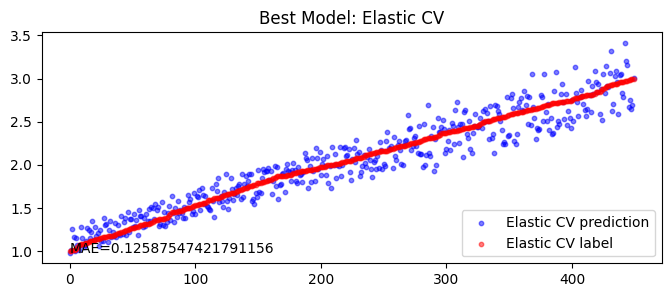

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
"""
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=1500,noise=True)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
elastic = skr.pipeBuild_ElasticNet(alpha=[0.5,1.0],selection=['cyclic','random'])
elastcv = skr.pipeBuild_ElasticNetCV()

# Multi Labeled Data
mten = skr.pipeBuild_MultiTaskElasticNet(alpha=[0.5,1.0])
mtencv = skr.pipeBuild_MultiTaskElasticNetCV()

names=['Elastic','Elastic CV']
pipes=[elastic,elastcv]

# Only use with Multi-label Regression Data
#names=['Multi Elastic','Multi Elastic CV']
#pipes=[mten,mtencv]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

### Huber Regression

</br>

**References:**

1.   https://cvxr.rbind.io/cvxr_examples/cvxr_huber-regression/
2.   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html
3.   https://scikit-learn.org/stable/modules/linear_model.html#huber-regression
4.   https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f


</br>

Huber regression is a technique that is robust to outliers <a href="https://cvxr.rbind.io/cvxr_examples/cvxr_huber-regression/">[1]</a>. It use a different loss function than the traditional least-squares <a href="https://cvxr.rbind.io/cvxr_examples/cvxr_huber-regression/">[1]</a>. It is an L2-regularized linear regression model <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html">[2]</a>.

</br>

> \begin{equation*}
minimize\text{ }β\text{ }\text{ }\text{ }\text{ }∑^m_{i=1}ϕ(y_i-x^T_iβ)
\end{equation*}

</br>

for variable $β∈R^n$, where the loss ϕ is the Huber function with threshold $M>0$,

</br>

> \begin{equation*}
f(n) = \begin{cases}
u^2 & if\text{ }|u|≤M \\
2Mu-M^2 & if\text{ }|u|>M
\end{cases}
\end{equation*}

</br>

"This function is identical to the least squares penalty for small residuals, but on large residuals, its penalty is lower and increases linearly rather than quadratically. It is thus more forgiving of outliers."  <a href="https://cvxr.rbind.io/cvxr_examples/cvxr_huber-regression/">[1]</a>

"The Huber Regressor is different to Ridge because it applies a linear loss to samples that are classified as outliers. A sample is classified as an inlier if the absolute error of that sample is lesser than a certain threshold. It differs from TheilSenRegressor and RANSAC Regressor because it does not ignore the effect of the outliers but gives a lesser weight to them."  <a href="https://scikit-learn.org/stable/modules/linear_model.html#huber-regression">[3]</a>

**Key Parameters:**

* **epsilon:** "The ***epsilon*** parameter determines the threshold for switching between the linear loss (MSE) and the absolute loss (MAE). It controls the robustness of the regression algorithm to outliers. Smaller values of ***epsilon*** emphasize the MSE loss, making the algorithm more similar to ordinary least squares (OLS) regression, while larger values emphasize the MAE loss, making it more robust to outliers."  <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>

* **alpha:** "The ***alpha*** parameter represents the regularization strength. It applies an L1 regularization penalty on the coefficient estimates, similar to the Lasso regression. The higher the value of ***alpha***, the stronger the regularization, which can help prevent overfitting by shrinking the coefficient estimates towards zero."  <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>

* **fit_intercept:** "The ***fit_intercept*** parameter determines whether to include an intercept term in the regression model. Setting it to ***True*** allows the model to learn an intercept, while setting it to ***False*** assumes a ***zero*** intercept."  <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>

***Pros***

*   ***Robustness to Outliers*** - achieved by using a hybrid loss function that transitions between ***mean squared loss (MSE)*** and ***mean absolute loss (MAE)***, which has the effect of downweighting the influence of outliers onf parameter estimates. <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>
*   ***Balances Least Squares & Absolute Deviation*** - Strikes a balance between OLS and L1 regresssion.  Uses OLS efficiency with normally distributed residuals and uses L1 with outliers. <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>
*   ***Continuity and Differentiability*** - "The Huber loss function used in the HuberRegressor is continuous and differentiable, ensuring that optimization algorithms can be applied effectively to minimize the loss function. This enables efficient parameter estimation using methods like gradient descent or quasi-Newton methods." <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>
*   ***Tunable Robustness*** - "The HuberRegressor allows you to control the robustness to outliers through the epsilon parameter. By adjusting the epsilon value, you can customize the level of robustness to match the characteristics of your dataset. Smaller epsilon values emphasize the squared loss (MSE), making the model more similar to OLS regression, while larger epsilon values emphasize the absolute loss (MAE), enhancing robustness to outliers." <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>

*   ***Predictive Performance*** - "In datasets with outliers or situations where outliers are expected, the HuberRegressor can provide better predictive performance compared to OLS regression. By reducing the influence of outliers on the model's parameter estimates, the algorithm can yield more accurate predictions and improved overall performance metrics." <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>

*   ***Computational Efficiency*** - "Although the HuberRegressor may be slightly computationally more expensive than OLS regression due to the hybrid loss function, it is generally more efficient compared to some other robust regression techniques like RANSAC (Random Sample Consensus) or Theil-Sen estimator. This efficiency This efficiency makes the HuberRegressor a practical choice for larger datasets." <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>


***Cons***

*   ***Parameter Tuning*** - "The Huber regressor has a tuning parameter called epsilon (ε) that determines the threshold for the switch between a linear loss (MSE) and an absolute loss (MAE). Choosing an appropriate value for epsilon can be challenging and requires careful consideration. A smaller epsilon value emphasizes the use of the MSE loss, making the Huber regressor behave more like OLS regression, while a larger epsilon value emphasizes the use of the MAE loss, making it more robust to outliers." <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>

*   ***Sensitivity to Outliers*** - "Although the Huber regressor is designed to be more robust to outliers compared to OLS regression, it can still be sensitive to extreme outliers. If the dataset contains severe outliers that deviate significantly from the general pattern of the data, they can have a noticeable impact on the model's performance. It is crucial to analyze and preprocess the data appropriately to mitigate the influence of outliers." <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>

*   ***Computational Complexity*** - "The Huber regression algorithm is computationally more expensive compared to OLS regression due to the presence of the epsilon parameter and the use of a different loss function. This can be a consideration when working with large datasets or when there are time constraints." <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>

*   ***Subjectivity in Loss Function Choice*** - "The Huber regressor uses a hybrid loss function that transitions between MSE and MAE. The choice of the loss function can be somewhat subjective and depends on the specific requirements of the problem at hand. Different loss functions may yield different results, so it's essential to consider the trade-offs and understand the implications of the chosen loss function." <a href="https://ogre51.medium.com/a-comprehensive-guide-to-huber-regression-balancing-efficiency-and-robustness-for-reliable-d65f122f317f">[4]</a>

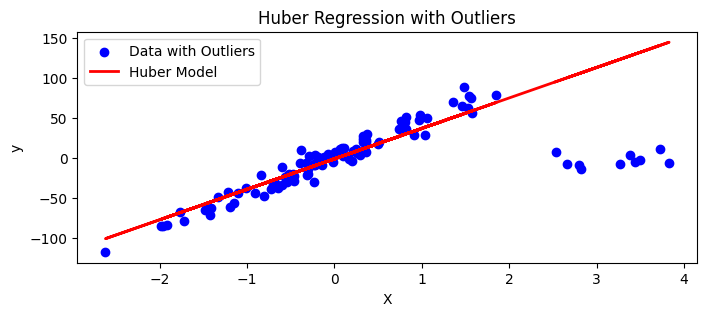

Slope: 38.08, Intercept: -1.32


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression

# Generate synthetic data with noise and outliers
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Add outliers
X[:10] = 3 + 0.5 * np.random.randn(10, 1)
y[:10] = -3 + 10 * np.random.randn(10)

# Fit a Huber Regressor
huber = HuberRegressor()
huber.fit(X, y)

# Make predictions
y_pred = huber.predict(X)

# Plot data and Huber fitted line
plt.scatter(X, y, color='blue', label='Data with Outliers')
plt.plot(X, y_pred, color='red', label='Huber Model', linewidth=2)
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Huber Regression with Outliers')
plt.show()

# Print the slope and intercept
print(f"Slope: {huber.coef_[0]:.2f}, Intercept: {huber.intercept_:.2f}")


Length of waveform 1000
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameter (CV score=-0.144):
{'huber__alpha': 0.01, 'huber__epsilon': 1.35, 'huber__fit_intercept': True, 'huber__max_iter': 100, 'huber__tol': 1e-05, 'huber__warm_start': False}


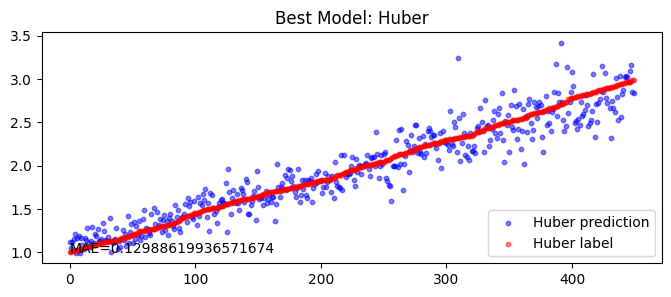

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=1500,noise=True)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
huber = skr.pipeBuild_HuberRegressor(epsilon=[1.35,0.75,0.35],alpha=[0.01,0.001,0.0001],fit_intercept=[False,True])


names=['Huber']
pipes=[huber]

# Only use with Multi-label Regression Data
#names=['Multi Elastic','Multi Elastic CV']
#pipes=[mten,mtencv]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

### RANSAC Regressor

</br>

**References:**

1.   https://medium.com/@jjsham/ransac-machine-learning-algorithm-review-note-e3438c9decc4
2.   https://www.baeldung.com/cs/ransac
3.   https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression

</br>

One of the common issues in machine learning is outliers in the dataset, but we do not want the outliers to influence the prediction. **Random Sample Consensus (RANSAC)** is an algorithm that can overcome this issue and a is a robust solution to replace linear regression if outliers are the concern of your prediction model. [1]

RANSAC is an improved algorithm to encounter outliers in linear regression. It is an iterative and non-deterministic method to train the model to take out the outlier influence in the model. [1]

**Key Concepts:**

1. **Inliers vs Outliers:**

  * Inliers are the data points that fit the assumed model within a certain threshold of error.

  * Outliers are data points that do not fit the model well and are typically considered noise or incorrect data points.

2. **Model Estimation:**

  * RANSAC is typically used to estimate the parameters of a model (e.g., a line, plane, or transformation) when the dataset contains outliers that would otherwise negatively affect the model's accuracy if standard methods (like least squares) were used.

3. **Iterative Process:** RANSAC works by:

  * Randomly selecting a small subset of the data points to fit the model.

  * Evaluating the model by determining how many data points (inliers) fit the model within a certain tolerance (threshold).

  * Repeating this process for a fixed number of iterations or until a sufficient number of inliers is found.

4. **Goal:**

  * The objective is to find the model that has the highest number of inliers in the data, thus ensuring the model is robust to outliers.


**RANSAC Algorithm Overview:**

1. **Input:**

  * A set of data points.

  * A model to be fitted (e.g., line, plane, etc.).

  * A tolerance value (threshold) for determining inliers.

  * The maximum number of iterations.

2. **Steps:**

  * **Random Sampling:** Select a small random subset of the data points (at least the minimum number required to fit the model).

  * **Model Fitting:** Fit a model to this subset of points.

  * **Inlier Determination:** Evaluate all points in the dataset to determine how many of them are inliers (i.e., how well they fit the model within the given threshold).

  * **Iteration:** Repeat this process for a set number of iterations or until the best model with the most inliers is found.

  * **Final Model:** After iterating, the model with the highest number of inliers is considered the best model.

3. **Output:**

  * The model parameters that best fit the inliers (a robust model).

  * Optionally, the inliers that correspond to the fitted model.

**Pros:**

* **Robustness to Outliers:** RANSAC can handle datasets with a large proportion of outliers and still produce a reasonable model estimate.

* **Simple and Efficient:** The algorithm is relatively easy to implement and can be computationally efficient for datasets with large numbers of points.

* **Wide Applications:** RANSAC is used in various applications, such as fitting lines or planes in computer vision, 3D reconstruction, motion estimation, and more.

**Cons:**

* **Parameter Sensitivity:** RANSAC requires tuning several parameters, such as the inlier threshold and the number of iterations. Choosing inappropriate values can lead to poor results.

* **Performance Degradation with High Outlier Proportion:** RANSAC may struggle to find a good model if the dataset contains too many outliers, as the random sampling may frequently select outliers as part of the model fitting process.

* **Computational Cost:** If the number of iterations is too high or the dataset is large, RANSAC can become computationally expensive.

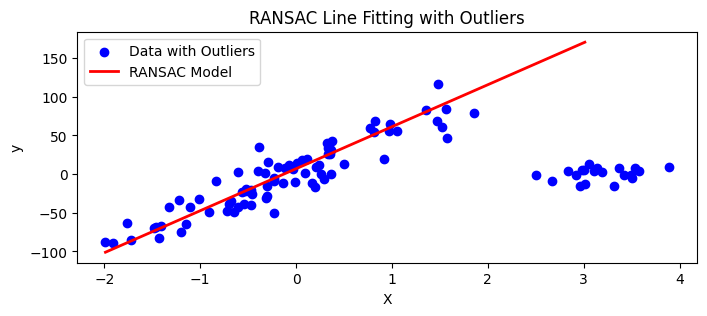

Inliers (Number of data points inliers): 58
Outliers (Number of data points outliers): 42


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

# Generate synthetic data with noise and outliers
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Add outliers
X[:20] = 3 + 0.5 * np.random.randn(20, 1)
y[:20] = -3 + 10 * np.random.randn(20)

# Fit a RANSAC regressor
ransac = RANSACRegressor()
ransac.fit(X, y)

# Predict using the RANSAC model
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

# Plot data and RANSAC model
plt.scatter(X, y, color='blue', label='Data with Outliers')
plt.plot(line_X, line_y_ransac, color='red', label='RANSAC Model', linewidth=2)
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('RANSAC Line Fitting with Outliers')
plt.show()

# Print inliers and outliers
print(f"Inliers (Number of data points inliers): {np.sum(ransac.inlier_mask_)}")
print(f"Outliers (Number of data points outliers): {np.sum(~ransac.inlier_mask_)}")


Length of waveform 1000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameter (CV score=-1.016):
{'ranscar__estimator': None, 'ranscar__is_data_valid': None, 'ranscar__is_model_valid': None, 'ranscar__loss': 'squared_error', 'ranscar__max_skips': inf, 'ranscar__max_trials': 100, 'ranscar__min_samples': None, 'ranscar__residual_threshold': None, 'ranscar__stop_n_inliers': inf, 'ranscar__stop_probability': 0.99, 'ranscar__stop_score': inf}


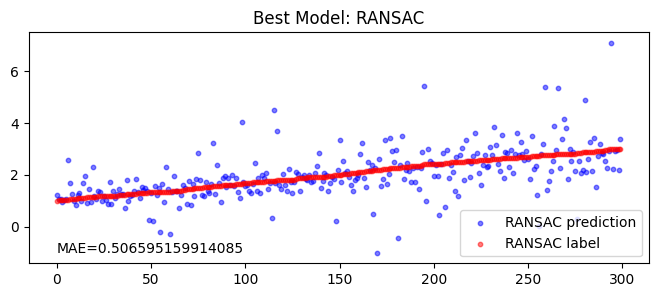

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
"""
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=1000,noise=True)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
ransac = skr.pipeBuild_RANSACRegressor(loss=['absolute_error','squared_error'])


names=['RANSAC']
pipes=[ransac]

# Only use with Multi-label Regression Data
#names=['Multi Elastic','Multi Elastic CV']
#pipes=[mten,mtencv]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_root_mean_squared_error')

### TheilSen Regressor

The **Theil-Sen Regressor** is a robust regression technique used to estimate a linear model in the presence of outliers. It is particularly useful when you have a dataset that contains outliers that might heavily influence the results if standard methods (like Ordinary Least Squares) are used.

**Features:**

1. **Robustness:**

  * The Theil-Sen Estimator is a non-parametric method that is robust to outliers. It works by computing the median of the slopes of all possible pairs of data points, which makes it less sensitive to extreme values (outliers) compared to methods like Ordinary Least Squares (OLS).

2. **Median of Slopes:**

  * Instead of minimizing the sum of squared residuals (as in OLS), the Theil-Sen Estimator computes the median of the slopes of all lines formed by pairs of data points. This makes the method more robust against outliers, as extreme points have less influence on the median compared to the mean.

3. **Uses:**

  * The Theil-Sen Estimator is typically used in regression problems where the data is assumed to have some outliers or noise that might otherwise unduly influence the results of traditional regression techniques.

**Steps:**

1. **Pairwise Slopes:** The Theil-Sen Estimator computes the slope for every pair of points in the data. The slope between each pair of points is calculated by:

  $$
    m_{ij} = \frac{y_j - y_i}{x_j - x_i}
  $$

  **where**

  $(x_i,y_i)$ and $(x_j,y_j)$ are two points in the dataset.

  </br>

2. **Median of Slopes:** Once all pairwise slopes are calculated, the median of all the slopes is taken. This median slope becomes the slope of the fitted line.

3. **Intercept:** The intercept of the line is then computed using the median slope and the median of the $y$-intercepts (for each pair of points).

**Pros:**

1. It is robust to outliers and can perform well in datasets with a significant number of them.

2. It doesn't assume that the data follows a normal distribution, which makes it a good choice for non-Gaussian data.

**Cons:**

1. The computational cost of finding the median of slopes can be high for large datasets.

2. It can only handle linear regression problems (i.e., fitting a straight line to data).

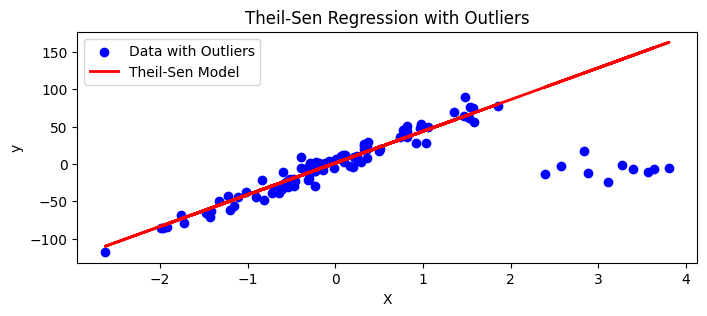

Slope: 42.48, Intercept: 1.30


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression

# Generate synthetic data with noise and outliers
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Add outliers
X[:10] = 3 + 0.5 * np.random.randn(10, 1)
y[:10] = -3 + 10 * np.random.randn(10)

# Fit a Theil-Sen Regressor
model = TheilSenRegressor()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot data and Theil-Sen fitted line
plt.scatter(X, y, color='blue', label='Data with Outliers')
plt.plot(X, y_pred, color='red', label='Theil-Sen Model', linewidth=2)
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Theil-Sen Regression with Outliers')
plt.show()

# Print the slope and intercept
print(f"Slope: {model.coef_[0]:.2f}, Intercept: {model.intercept_:.2f}")


Length of waveform 1000
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_theil_sen.py:419: FutureWarning:

`copy_X` was deprecated in 1.6 and will be removed in 1.8 since it has no effect internally. Simply leave this parameter to its default value to avoid this warning.



Best parameter (CV score=-0.252):
{'thielsen__copy_X': True, 'thielsen__fit_intercept': True, 'thielsen__max_iter': 300, 'thielsen__max_subpopulation': 10000.0, 'thielsen__n_jobs': None, 'thielsen__n_subsamples': None, 'thielsen__tol': 0.001, 'thielsen__verbose': False}


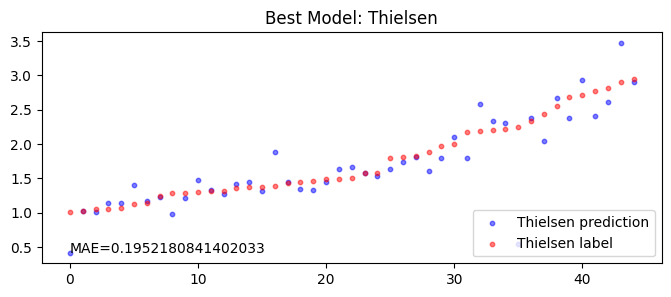

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=150,noise=True)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
thielsen = skr.pipeBuild_TheilSenRegressor()


names=['Thielsen']
pipes=[thielsen]

# Only use with Multi-label Regression Data
#names=['Multi Elastic','Multi Elastic CV']
#pipes=[mten,mtencv]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

## Orthoganal Marching Pursuit

Orthogonal Matching Pursuit (OMP) is a greedy algorithm used to solve the problem of sparse signal representation. The main goal is to approximate a signal by finding a sparse linear combination of a set of basis functions or dictionary elements (columns of a matrix). This method is widely used in signal processing, machine learning, and compressed sensing.

**Key Features:**

* **Greedy Algorithm:** It builds the approximation iteratively, always choosing the best match at each step.

* **Sparsity:** The goal of OMP is to produce a sparse solution (i.e., using as few dictionary elements as possible).

* **Orthogonality:** Each new selection of a dictionary element is orthogonal to the previous residuals. This means that each chosen element adds unique information to the approximation, reducing redundancy.

**Algorithm:**

The algorithm iteratively selects the dictionary elements that best match the signal, with the following steps:



1. **Initialization:**

  *   Start with an initial residual (usually the signal itself).

  *   The solution is initialized as an empty set.



2. **Selection Step:**

  * In each iteration, the algorithm finds the dictionary element (column of the dictionary matrix) that is most correlated with the current residual (using a similarity measure, often the dot product or inner product).

  * The selected element is added to the set of chosen elements.

3. **Update Step:**

  * Solve a least-squares problem to update the coefficients of the selected dictionary elements. This ensures the best approximation of the signal using the chosen dictionary elements.

  * The residual is updated by subtracting the projection of the signal onto the selected elements.

4. **Repeat:**

  * The algorithm repeats steps 2 and 3 for a predefined number of iterations or until the residual is small enough (i.e., the signal has been approximated sufficiently well).

5. **Termination:**

  * The process stops when a predefined stopping condition is met, such as reaching a certain number of iterations or the residual being sufficiently small.

**Pros:**

* **Computationally Efficient:** It is faster than methods like Lasso or Ridge for certain high-dimensional problems.

* **Sparse Models:** It produces sparse solutions, which means many of the coefficients are zero, leading to simpler, more interpretable models.

* **Feature Selection:** It automatically selects a small subset of the features that are most important for predicting the target variable.

**Cons:**

* **Greedy Approach:** Since OMP is greedy, it doesn't guarantee an optimal solution and can sometimes get stuck in a local minimum.

* **Overfitting:** If not properly tuned (e.g., choosing too many features), it can overfit the data, especially in cases with many irrelevant features.

### Orthoganal Marching Pursuit with Cross Validation

The classic algorithm with cross-validation built in.

Length of waveform 1000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.245):
{'thielsen__copy_X': True, 'thielsen__fit_intercept': True, 'thielsen__max_iter': 300, 'thielsen__max_subpopulation': 10000.0, 'thielsen__n_jobs': None, 'thielsen__n_subsamples': None, 'thielsen__tol': 0.001, 'thielsen__verbose': False}


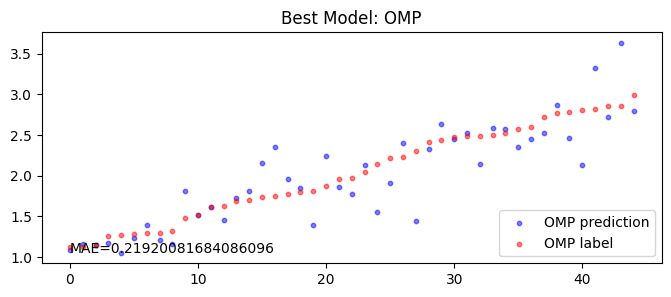

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.218):
{'ompcv__copy': True, 'ompcv__cv': None, 'ompcv__fit_intercept': True, 'ompcv__max_iter': None, 'ompcv__n_jobs': None, 'ompcv__verbose': False}


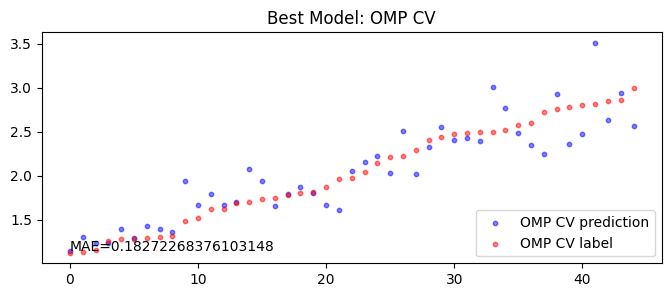

In [ ]:
#from _typeshed import OpenTextModeUpdating
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=150,noise=True)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
omp = skr.pipeBuild_TheilSenRegressor()
ompcv = skr.pipeBuild_OrthogonalMatchingPursuitCV()


names=['OMP','OMP CV']
pipes=[omp,ompcv]

# Only use with Multi-label Regression Data
#names=['Multi Elastic','Multi Elastic CV']
#pipes=[mten,mtencv]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

## Passive Aggressive Regressor

A Passive Aggressive Regressor is a type of machine learning model used for regression tasks, which means predicting a continuous value. It's part of the family of linear models but has a unique way of updating its parameters during training. It's called "passive-aggressive" because of its update mechanism.

The model is designed to be efficient and scalable for large datasets, as it performs updates after each individual data point (online learning). This makes it suitable for problems with a large number of data points or when the data arrives in a stream.

* **Online Learning:**

  * The Passive-Aggressive Regressor is designed for online learning, meaning that it is suitable for situations where data comes in a stream, and the model needs to update itself continuously as new data arrives.

  * The model is updated incrementally without the need to retrain the model from scratch every time new data is observed.

* **Passive-Agressive Update:**

  * ***Passive:*** If the model makes a correct prediction (close to the target value), it doesn't make any changes to its parameters—it's passive.

  * ***Aggressive:*** If the model makes a wrong prediction (the predicted value is far from the target), it aggressively adjusts its parameters to minimize the error.

* **Loss function:**

  * The model uses a loss function that incorporates both squared loss (for inliers) and a regularization term (to prevent overfitting). The goal is to keep the model's weights as small as possible while ensuring it is sufficiently responsive to changes in the data.

* **Efficiency:**

  * It is computationally efficient and works well when the data is large or arrives in a streaming manner. Unlike batch learning models (e.g., Linear Regression), the Passive-Aggressive Regressor doesn’t require access to the entire dataset at once.

* **Hyperparameter:**

  * **C:** This is the regularization parameter that controls the trade-off between fitting the model to the data and keeping the model weights small. A large value of C means the model will adapt aggressively to new data, whereas a small value of C makes the model more conservative and less sensitive to changes.

**Steps:**

1. **Initialization:**

  * The model starts with an initial weight vector (often initialized to zero).

2. **Processing Each Data Point:**

  * For each new data point, the model checks whether the current prediction (based on the existing weights) is close enough to the true value.

  * If the prediction is close to the true value, the model remains passive and does not update the weights significantly.

  * If the prediction is far from the true value, the model updates the weights aggressively to minimize the error.

3. **Update Rule:**

  * The update rule involves adjusting the weights only when the prediction error is large enough. The magnitude of the update depends on the error and the C parameter.

Length of waveform 1000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.164):
{'par__C': 1.0, 'par__average': False, 'par__early_stopping': False, 'par__epsilon': 0.1, 'par__fit_intercept': True, 'par__loss': 'epsilon_insensitive', 'par__max_iter': 1000, 'par__n_iter_no_change': 5, 'par__shuffle': True, 'par__tol': 0.001, 'par__validation_fraction': 0.1, 'par__verbose': 0, 'par__warm_start': False}


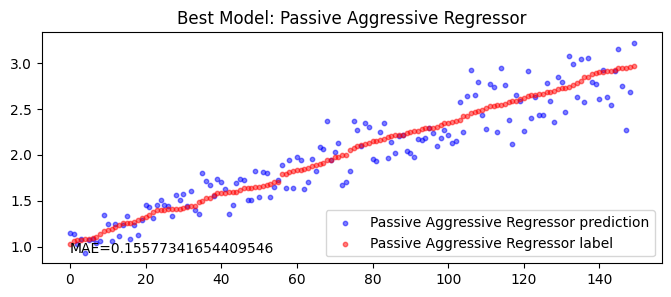

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=500,noise=True)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
par = skr.pipeBuild_PassiveAggressiveRegressor()


names=['Passive Aggressive Regressor']
pipes=[par]

# Only use with Multi-label Regression Data
#names=['Multi Elastic','Multi Elastic CV']
#pipes=[mten,mtencv]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

## Perceptron Regressor

A Perceptron Regressor is a type of machine learning model used for regression tasks. It’s based on the perceptron, which is one of the simplest types of artificial neural networks. However, unlike the traditional perceptron that’s used for classification, the perceptron regressor is designed for predicting continuous numerical values.

**Basic Concept:**

* **Perceptron:** A perceptron is a type of linear classifier that makes predictions by calculating a weighted sum of the input features and passing it through an activation function (typically a step function in its simplest form).

* **Regression:** In a regression task, the goal is to predict a continuous value (such as predicting the price of a house based on its features).

**How the Perceptron Regressor Works:**

* The perceptron regressor model is trained to minimize the difference between its predicted output and the actual target value.

* The model uses a linear function of the input features and learns the weights that minimize the error. The output is a continuous value, rather than a discrete class label.

1. **Training Process:**

  * The Perceptron Regressor adjusts its model weights through an iterative process to minimize the prediction error. It uses a simple learning rule that updates the weights whenever there is an error (difference between the predicted and actual target).

  * The weights are updated as follows:

  $$
    w_{new} = w_{old} + n ⋅ (y_{true} - y_{predicted}) \cdot x
  $$

  **where:**

  * $w_{new}$ and $w_{old}$ are the weights before and after the update.

  * $n$ is the learning rate, which controls how much the weights are adjusted.

  * $y_{true}$is the true target value.

  * $y_{predicted}$ is the model's prediction.

  * $x$ is the input feature vector.

2. **Learning Rule:**

  * The learning rule involves making adjustments only when the model's prediction is incorrect. The model keeps adjusting its weights until the predictions align with the target values (or until a certain number of iterations are reached).

**Pros:**

* **Simple and Fast:** The Perceptron Regressor is computationally simple and fast, making it a good choice for problems where you need quick, approximate solutions.

* **Online Learning:** The Perceptron Regressor can work in an online learning setting, where the model is updated iteratively as new data becomes available.

**Cons:**

* **Linear Assumption:** The Perceptron Regressor assumes a linear relationship between the features and the target, so it may not perform well on non-linear data.

* **Sensitive to Outliers:** Since the Perceptron Regressor updates its weights based on errors, it can be quite sensitive to outliers in the data.

* **No Convergence Guarantee:** The Perceptron algorithm does not guarantee convergence for non-linearly separable data, though it will converge for linearly separable data (in the case of classification).

Length of waveform 1000
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter (CV score=-0.267):
{'mlpregressor__activation': 'relu', 'mlpregressor__alpha': 0.0001, 'mlpregressor__batch_size': 'auto', 'mlpregressor__beta_1': 0.9, 'mlpregressor__beta_2': 0.999, 'mlpregressor__early_stopping': False, 'mlpregressor__epsilon': 1e-08, 'mlpregressor__hidden_layer_sizes': (100,), 'mlpregressor__learning_rate': 'constant', 'mlpregressor__learning_rate_init': 0.001, 'mlpregressor__max_fun': 15000, 'mlpregressor__max_iter': 200, 'mlpregressor__momentum': 0.9, 'mlpregressor__n_iter_no_change': 5, 'mlpregressor__nesterovs_momentum': True, 'mlpregressor__power_t': 0.5, 'mlpregressor__shuffle': True, 'mlpregressor__tol': 0.001, 'mlpregressor__validation_fraction': 0.1, 'mlpregressor__verbose': 0, 'mlpregressor__warm_start': False}


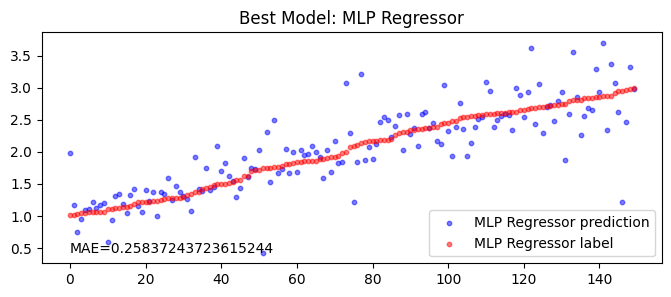

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=500,noise=False)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
mlp = skr.pipeBuild_MLPRegressor(alpha=[0.1,0.01,0.001,0.0001])


names=['MLP Regressor']
pipes=[mlp]

# Only use with Multi-label Regression Data
#names=['Multi Elastic','Multi Elastic CV']
#pipes=[mten,mtencv]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

## Quantile Regressor

A Quantile Regressor is a type of regression model that estimates the conditional quantiles of the response variable, rather than its mean. In simpler terms, while traditional linear regression models estimate the expected (average) value of the dependent variable for a given set of input features, quantile regression provides a way to estimate any quantile (e.g., median, 90th percentile, etc.).

### Key Concepts:

**Quantiles:** Quantiles divide data into intervals with equal probabilities. For example:

* The **median** is the 50th percentile (the 0.5 quantile).
* The **upper quartile** is the 75th percentile (the 0.75 quantile).
* The **lower quartile** is the 25th percentile (the 0.25 quantile).

**Objective:**

* Instead of modeling the mean of the target variable, quantile regression models the relationship between the predictors and different quantiles of the target distribution.

* For a given quantile $τ$, it tries to find a regression line (or hyperplane in higher dimensions) such that the
𝜏
τ-th quantile of the target variable's distribution is predicted.

**Loss Function:**

* The loss function used in quantile regression is asymmetric, designed to minimize the absolute error in a way that depends on the quantile being estimated.

* The loss function for a quantile $τ$ is:

  $$
    p_{τ}(y_i,\hat{y}_i) = \left\{ \begin{array}{rcl} \tau \cdot (y_i - \hat{y}_i) & \mbox{if} & y_i \geq \hat{y}_i \\ (1-\tau) \cdot (\hat{y}_i - y_i) & \mbox{if} & y_i < \hat{y}_i  \end{array}\right.
  $$

  **where:**

  * $y_i$ is the true value of the target variable.

  * $\hat{y}_i$ is the predicted value from the model.

  * $τ$ is the quantile level (e.g., $τ = 0.5$ for the median, $τ = 0.9$ for the 90th percentile).

  * The function penalizes overestimates and underestimates differently, depending on the quantile being estimated.



**Note:**

Quantile regression uses a quantile loss function (also known as pinball loss) to estimate the desired quantile. For the τth quantile, the loss function is asymmetric, meaning the penalty for over- and under-predictions differs depending on whether the prediction is above or below the actual value.


**Pros:**

* **Flexible:** Unlike traditional regression that only estimates the mean, quantile regression allows you to estimate various quantiles (e.g., median, 90th percentile), which can provide a more complete picture of the data distribution.

* **Robust to Outliers:** Since it focuses on specific quantiles rather than the mean, it is less sensitive to outliers in the data.

* **Better for Asymmetric Distributions:** It is particularly useful when the target variable has a skewed or asymmetric distribution.

**Cons:**

* **Computational Complexity:** Quantile regression is typically more computationally expensive than standard regression models because of the non-differentiable loss function.

* **Not Ideal for All Problems:** If you only care about predicting the mean of the target variable and don't care about other quantiles, a standard regression model might be simpler and more efficient.

Length of waveform 1000
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameter (CV score=-0.508):
{'quant__alpha': 1.0, 'quant__fit_intercept': True, 'quant__quantile': 0.5, 'quant__solver': 'revised simplex', 'quant__solver_options': None}


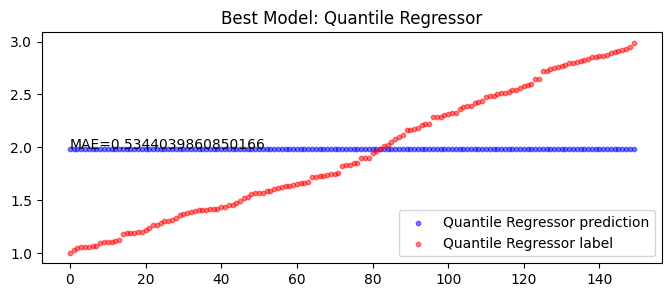

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=500,noise=True)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
quant = skr.pipeBuild_QuantileRegressor(quantile=[0.25,0.5,0.75],solver=['highs-ds','highs-ipm', 'highs','interior-point','revised simplex'])


names=['Quantile Regressor']
pipes=[quant]

# Only use with Multi-label Regression Data
#names=['Multi Elastic','Multi Elastic CV']
#pipes=[mten,mtencv]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

## Stochastic Gradient Descent Regressor

A Stochastic Gradient Descent Regressor (SGD Regressor) is a machine learning algorithm used for regression tasks. It's a variant of gradient descent that updates the model's parameters (weights) incrementally, rather than using the entire dataset at once. Here's a breakdown of the key components:

#### Gradient Descent:

* In machine learning, gradient descent is an optimization algorithm used to minimize the error or loss function by iteratively updating the model’s parameters in the direction that reduces the loss.

* This is done by calculating the gradient (or derivative) of the loss function with respect to the model's parameters and moving in the opposite direction of the gradient.

#### Stochastic Gradient Descent (SGD):

* Unlike batch gradient descent, which uses the entire dataset to calculate the gradient in each step, stochastic gradient descent uses a single randomly selected data point (or a small batch) to compute the gradient at each step.

* Because it updates the model's parameters after looking at just one data point, SGD is faster than batch gradient descent and can handle large datasets more efficiently.

#### SGD Regressor:

* The SGD Regressor specifically applies stochastic gradient descent to regression problems. It aims to minimize the loss function (e.g., mean squared error) between predicted values and true values.

* It is typically used when you want to fit a model to predict continuous values based on input features (like predicting house prices or stock prices).

### Benefits:

* Efficiency: It's faster than traditional gradient descent methods, especially when dealing with large datasets.

* Flexibility: You can tune the learning rate and other hyperparameters to control the behavior of the model.

* Convergence: Since it's based on individual data points, it can be noisy, but with enough iterations, it usually converges to an optimal solution.
Online Learning: SGD can be used for online learning, where the model can be updated incrementally as new data comes in.

Concepts:

1. **Gradient Descent:**

  * In standard gradient descent, the model's parameters are updated by calculating the gradient of the loss function with respect to all training data points and moving in the direction that minimizes the loss.

  * The update step for the model's parameters $w$ and $b$ (weights and bias) can be described as:

  $$
    w ← w - n \frac{∂J(w)}{∂w}
  $$

  $$
    b ← b - n \frac{∂J(w)}{∂b}
  $$

  **where:**

  * $n$ is the learning rate, which determines how big each step should be.

  * $J(w)$ is the cost (or loss) function, which depends on the weights $w$ and bias $b$.

  * The gradients $\frac{∂J(w)}{∂w}$ and $\frac{∂J(w)}{∂b}$ are calculated based on the entire dataset.

  </br>

2. **Stochastic Gradient Descent (SGD):**

  * SGD is a variation of gradient descent where the parameters are updated after each individual data point (or a small batch of data points), rather than after considering the entire dataset.

  * This introduces randomness into the updates, making each step much faster because it doesn’t require computing gradients over all data points. As a result, SGD can be more computationally efficient, especially for large datasets.

  * The update rule for SGD is:

    $$
      w ← w - n \cdot ∇_w J(w;x_i,y_i)
    $$

    $$
      b ← b - n \cdot ∇_b J(w;x_i,y_i)
    $$
  
    where $(x_i,y_i)$ is a single training example and $∇_w J(w;x_i,y_i)$ is the gradient of the cost function with respect to the parameters, calculated based on this one example.

**Pros:**

* **Faster Convergence:** Since updates are made after each data point, SGD can converge faster, especially for large datasets.

* **Better for Online Learning:** Since it processes one data point at a time, SGD can be used in online learning scenarios where the model needs to be updated with new data without having to store the entire dataset in memory.

* **Escaping Local Minima:** The randomness in the updates due to the use of individual data points can help the algorithm escape local minima and potentially find better solutions in some cases.

**Cons:**

* **Noisy Updates:** Since the model is updated after each data point, the updates can be noisy, leading to fluctuations in the objective function. This means it may not converge as smoothly as batch gradient descent, and it could take longer to settle into the optimal solution.

* **Requires Tuning:** The learning rate $n$ needs to be carefully chosen. If it's too large, the updates may overshoot the minimum. If it's too small, convergence may be slow.

* **Convergence to a Local Minimum:** While SGD can escape local minima in non-convex problems, it may still converge to a local minimum in some cases, especially in problems that are convex but not smooth.

Length of waveform 1000
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameter (CV score=-0.182):
{'lsgd__alpha': 0.0001, 'lsgd__average': False, 'lsgd__early_stopping': False, 'lsgd__epsilon': 0.1, 'lsgd__eta0': 0.01, 'lsgd__fit_intercept': True, 'lsgd__l1_ratio': 0.15, 'lsgd__learning_rate': 'invscaling', 'lsgd__loss': 'huber', 'lsgd__max_iter': 1000, 'lsgd__penalty': 'l1', 'lsgd__power_t': 0.25, 'lsgd__shuffle': True, 'lsgd__tol': 0.001, 'lsgd__validation_fraction': 0.1, 'lsgd__verbose': 0, 'lsgd__warm_start': False}


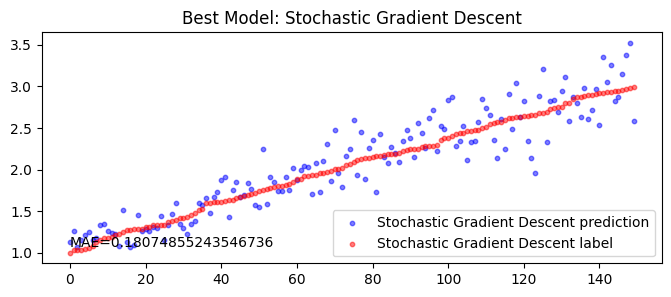

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
"""
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=500,noise=True)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
sgd = skr.pipeBuild_SGDRegressor(loss=['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],penalty=['l2','l1','elasticnet',None])


names=['Stochastic Gradient Descent']
pipes=[sgd]

# Only use with Multi-label Regression Data
#names=['Multi Elastic','Multi Elastic CV']
#pipes=[mten,mtencv]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

## Support Vector Machines

From **Avinash Navlani's Tutorial**.  See reference [1]

Updated: **Stephen Coshatt** with more references and descriptions
</br></br>

**Refernece:**

1.   https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
2.   https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
3.  https://data-flair.training/blogs/svm-kernel-functions/
4.  https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496
5.  https://tslearn.readthedocs.io/en/stable/user_guide/kernel.html
6.  https://marcocuturi.net/GA.html
7.  https://dataaspirant.com/svm-kernels/#t-1608054630730
8.  https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107
9.  https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/
10.  https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html
11.  https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#:~:text=Nu%20Support%20Vector%20Regression.,implementation%20is%20based%20on%20libsvm.

</br></br>

"Generally, Support Vector Machines are considered to be a classification approach, it but can be employed in classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes." [1]

**Support Vectors**
"Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier." [1]

**Hyperplane**
"A hyperplane is a decision plane which separates between a set of objects having different class memberships." [1]

**Margin**
"A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin." [1]


**How does SVM work?**
"The main objective is to segregate the given dataset in the best possible way. The distance between the nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure." [1]

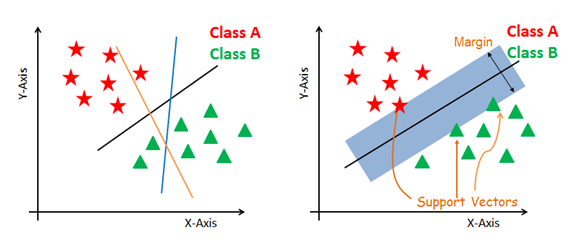

</br>

**Support Vectors for Regression**

"Unlike Support Vector Machines (SVMs) used for classification tasks, SVR seeks to find a hyperplane that best fits the data points in a continuous space. This is achieved by mapping the input variables to a high-dimensional feature space and finding the hyperplane that maximizes the margin (distance) between the hyperplane and the closest data points, while also minimizing the prediction error." <a href="https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/A">[9]</a>

"SVR can handle non-linear relationships between the input variables and the target variable by using a kernel function to map the data to a higher-dimensional space. This makes it a powerful tool for regression tasks where there may be complex relationships between the input variables and the target variable."  <a href="https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/A">[9]</a>

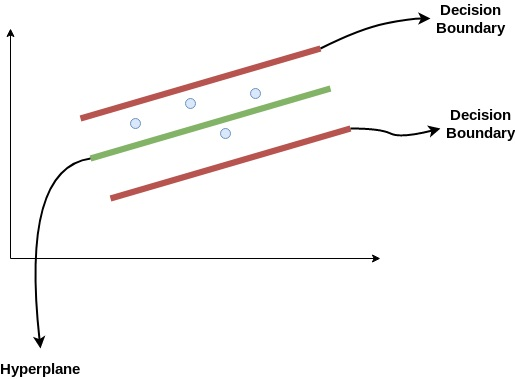

**Figure from <a href="https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/A">[9]</a>**


"Consider these two red lines as the decision boundary and the green line as the hyperplane. Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points."  <a href="https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/A">[9]</a>

</br>


**Dealing with non-linear and inseparable planes**
"Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side)." [1]

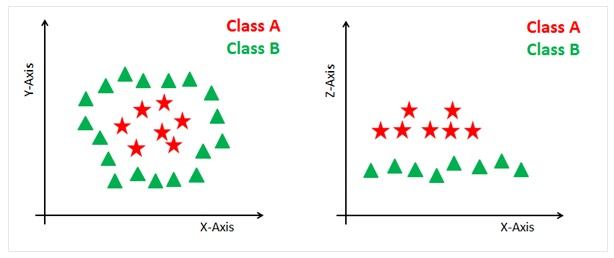

"In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2=y^2). Now you can easily segregate these points using linear separation." [1]

**SVM Kernels:**
"The function of kernel is to take data as input and transform it into the required form." [3]  "The SVM algorithm is implemented in practice using a kernel. ... SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier." [1]

1.  **Linear Kernel:**
"A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values." [1]  "In the linearly separable case, SVM is trying to find the hyperplane that maximizes the margin, with the condition that both classes are classified correctly," (100% correct classification). [3]

  $$
    K(x, xi) = ∑(x * xi)
  $$

    "But in reality, datasets are probably never linearly separable, so the condition of 100% correctly classified by a hyperplane will never be met." [3]

    The linear kernel is mostly preferred for text-classification problems as most of these kinds of classification problems can be linearly separated. [7]

    **Kernel Trick:** try to find a non-linear decision boundary [3].  What Kernel Trick does is it utilizes existing features, applies some transformations, and creates new features. Those new features are the key for SVM to find the nonlinear decision boundary. [4]

2.  **Polynomial Kernel:**
"A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space." [1]

    $$
      K(x,xi) = 1 + ∑(x * xi)^d
    $$

    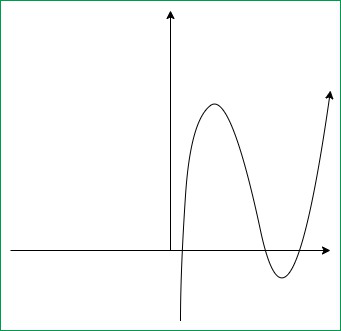

    "Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm." [1]

    This kernel is popular in image processing. [3]  It is a more generalized representation of the linear kernel. Outside of this, it is not as preferred as other kernel functions as it is less efficient and accurate. [7]

3.  **Gaussian Radial Basis Function Kernel (RBF):**
"The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space." [1]

    $$
      K(x,xi) = exp(-gamma * ∑((x - xi^2))
    $$

    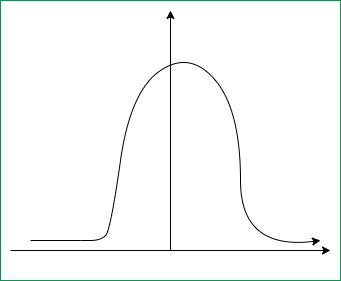

    "Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm." [1]

    It is a general-purpose kernel; used when there is no prior knowledge about the data. [3]  "It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data." [7]

4.  **Sigmoid Kernel:** [7]
It is mostly preferred for neural networks. This kernel function is similar to a two-layer perceptron model of the neural network, which works as an activation function for neurons. [7]

    It can be shown as:

    $$
      F(x, xj) = tanh(αxay + c)
    $$

    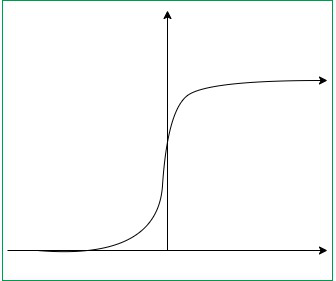

    Often used as the activation function for neural networks. [3]

5.  **Global Alignment Kernel (GAK):** [5]
The Global Alignment Kernel (GAK) is a kernel that operates on time series.

    It is defined, for a given bandwidth **σ**, as:

    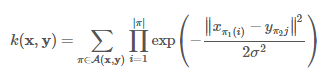

    where **A(x,y)** is the set of all possible alignments between series **x** and **y**.

    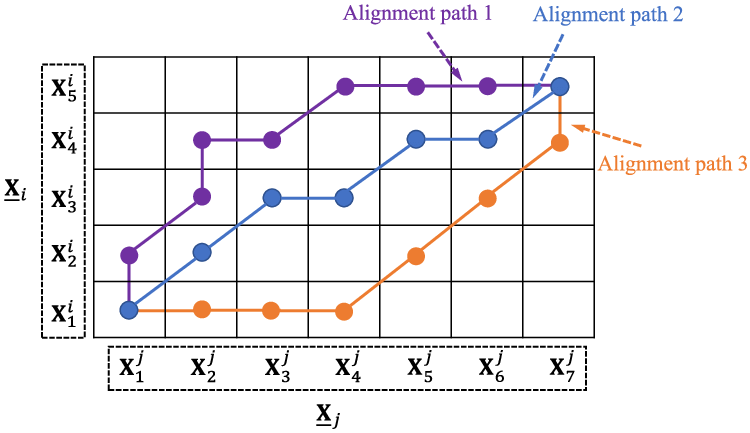

    It is advised in to set the bandwidth **σ** as a multiple of a simple estimate of the median distance of different points observed in different time-series of your training set, scaled by the square root of the median length of time-series in the set.

    In kernel methods, both large and small similarities matter, since they all contribute to the Gram matrix. Global Alignment (GA) kernels, which are positive definite, seem to do a better job of quantifying all similarities coherently, because they consider all possible alignments. [6]

    **Note:** This kernel is much slower than the other kernels


**Advantages:**
* SVM works relatively well when there is a clear margin of separation between classes. <a href="https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107">[8]</a>
* SVM is more effective in high dimensional spaces. <a href="https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107">[8]</a>
* SVM is effective in cases where the number of dimensions is greater than the number of samples. <a href="https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107">[8]</a>
* SVM is relatively memory efficient. <a href="https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107">[8]</a>

**Disadvantages:**
* SVM algorithm is not suitable for large data sets. <a href="https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107">[8]</a>
* SVM does not perform very well when the data set has more noise i.e. target classes are overlapping. <a href="https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107">[8]</a>
* In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform. <a href="https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107">[8]</a>

### Linear Support Vector

"Similar to SVR with parameter ***kernel='linear'***, but implemented in terms of ***liblinear*** rather than ***libsvm***, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples." <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html">[9]</a>

### Nu Support Vector

"Similar to NuSVC, for regression, uses a parameter nu to control the number of support vectors. However, unlike NuSVC, where nu replaces C, here nu replaces the parameter epsilon of epsilon-SVR."  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#:~:text=Nu%20Support%20Vector%20Regression.,implementation%20is%20based%20on%20libsvm.">[11]</a>

### Time Series Support Vector

Functions as SK Learn SVR, but with time series specific kernels.

Length of waveform 1000
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameter (CV score=-0.185):
{'svr__C': 1.0, 'svr__cache_size': 200, 'svr__coef0': 0.0, 'svr__degree': 3, 'svr__gamma': 'scale', 'svr__kernel': 'linear', 'svr__max_iter': -1, 'svr__shrinking': True, 'svr__tol': 0.001, 'svr__verbose': False}


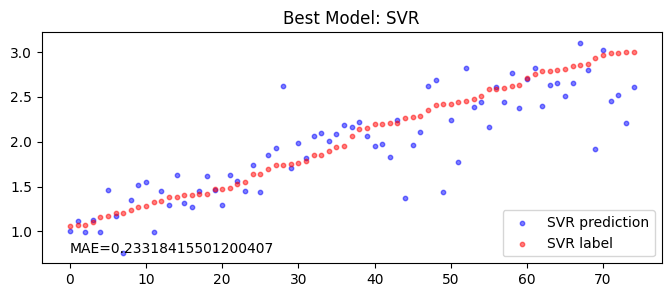

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.268):
{'lsvr__C': 1.0, 'lsvr__dual': True, 'lsvr__epsilon': 0.0, 'lsvr__fit_intercept': True, 'lsvr__intercept_scaling': 1.0, 'lsvr__loss': 'epsilon_insensitive', 'lsvr__max_iter': 1000, 'lsvr__tol': 0.0001, 'lsvr__verbose': False}


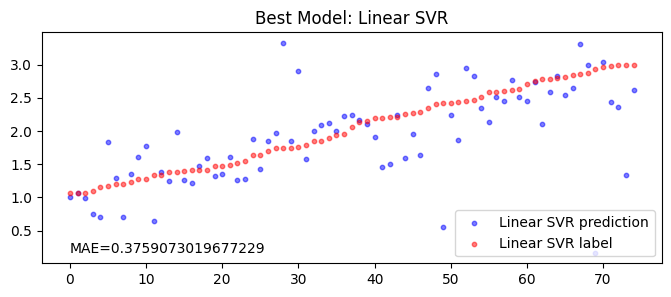

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameter (CV score=-0.227):
{'nusvr__C': 1.0, 'nusvr__cache_size': 200, 'nusvr__coef0': 0.0, 'nusvr__degree': 3, 'nusvr__gamma': 'scale', 'nusvr__kernel': 'rbf', 'nusvr__max_iter': -1, 'nusvr__nu': 0.5, 'nusvr__shrinking': True, 'nusvr__tol': 0.001, 'nusvr__verbose': False}


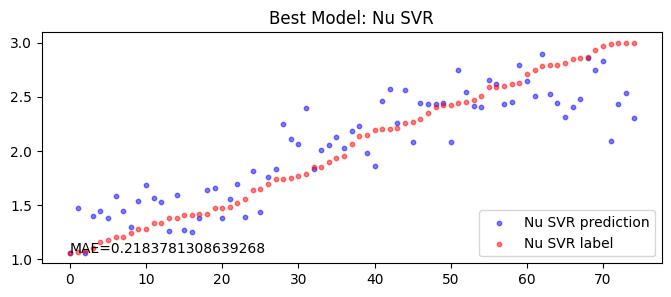

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=250,noise=True)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

# Single Labeled Data
svr = skr.pipeBuild_SVR(kernel=['linear', 'poly', 'rbf'])
linsvr = skr.pipeBuild_LinearSVR()
nusvr = skr.pipeBuild_NuSVR(kernel=['linear', 'poly', 'rbf'])
tssvr = skr.pipeBuild_KNeighborsTimeSeriesRegressor() # Uses 'gag' kernel by default

svr_lin = skr.pipeBuild_SVR(kernel=['linear'])
svr_poly = skr.pipeBuild_SVR(kernel=['poly'])
svr_rbf  = skr.pipeBuild_SVR(kernel=['rbf'])

names=['SVR','Linear SVR','Nu SVR']#,'Time Series SVR']
pipes=[svr,linsvr,nusvr]#,tssvr]

#names=['Linear','Poly','RBF']
#pipes=[svr_lin,svr_poly,svr_rbf]

#names=['Nu SVR']
#pipes=[nusvr]

# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')

## Time Series K Nearest Neighbors Regressor

*Author: Soumya Pal*

*Updated: Stephen Coshatt*

<br/>

**References:**


1.   https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
2.   https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
3.  https://www.geeksforgeeks.org/ml-nearest-centroid-classifier/
4.  https://machinelearningmastery.com/radius-neighbors-classifier-algorithm-with-python/

**K-Nearest Neighbors (kNN) [Supervised]**

"The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems." [1]

kNN algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

"The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other." [1]

**The KNN Algorithm  [1]**

1.  Load the data
2.  Initialize K to your chosen number of neighbors
3.  For each example in the data
    <ol>
      <li>Calculate the distance between the query example and the current example from the data.</li>
      <li>Add the distance and the index of the example to an ordered collection</li>
    </ol>
4.  Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5.  Pick the first K entries from the sorted collection
6.  Get the labels of the selected K entries
7.  If regression, return the mean of the K labels
8.  If classification, return the mode of the K labels

**Choosing the right value for K**

To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before. [1]

Here are some things to keep in mind:


1.   As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green. [1]
2.   Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far. [1]
3.   In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker. [1]


**Advantages**
*   No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period or derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.
*   Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.
*   KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)
*   Can be used both for Classification and Regression: One of the biggest advantages of K-NN is that K-NN can be used both for classification and regression problems.

**Disadvantages**
*   Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing point is huge which degrades the performance of the algorithm.
*   Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with a large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.
*   Requires feature scaling: Feature scaling (standardization and normalization) has to be done before applying KNN algorithm to any dataset, otherwise KNN may generate wrong predictions.
*   Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. So data has to be manipulated to impute missing values and remove outliers.

Length of waveform 1000
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.149):
{'tsknnreg__metric': 'dtw', 'tsknnreg__metric_params': None, 'tsknnreg__n_jobs': None, 'tsknnreg__n_neighbors': 5, 'tsknnreg__verbose': 0, 'tsknnreg__weights': 'uniform'}


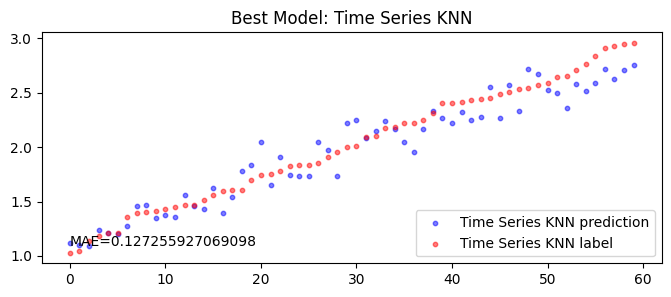

In [ ]:
# GET TIME SERIES DATASET & PRINT SAMPLE DATA
import numpy as np
from pathlib import Path # pathlib is OS agnostic
from lib.dsp import sine_wave, triangle_wave, square_wave, generate_regression_data
from pathlib import Path # pathlib is OS agnostic
from sklearn.model_selection import train_test_split

# import the regressor builders from the cloned python files
import lib.regression as skr

# diabetes data
"""
p = Path('.')
data_path = p / "data"
diabetes_data = np.load(data_path / "sk_diabetes.npy")

diabetes_x = diabetes_data[:, :diabetes_data.shape[1]-1]  # data
diabetes_x = diabetes_data[:, -1] # label
#"""

# generate waves with random frequencies and amplitudes
# frequencies are the labels
x, y = generate_regression_data(label_type='amplitude',wave_number=200,noise=True)

# Uncomment the x and y below if you want to use the diabetes data.
# Comment out if you want to use the random waveform data above
#x = diabetes_x
#y = diabetes_x


print("Length of waveform",len(x[0]))

# Normalize Data
#x = (x - x.mean(axis=0)) / x.std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

# SETUP & RUN GRIDSEARCH TRAINING & TESTING

tsknn = skr.pipeBuild_KNeighborsTimeSeriesRegressor()

names=['Time Series KNN']
pipes=[tsknn]


# Build and run a grid search for regressors.  Outputs best model and heat map of each type.
skr.gridsearch_regressor(names=names,pipes=pipes,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,scoring='neg_mean_absolute_error')